In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate


In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/DaisyYuan810/schulich_data_science/main/train.csv')

In [3]:
train_data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
# Drop the 'Unnamed: 0' and 'id' columns
clean_data = train_data.drop(columns=['Unnamed: 0', 'id'])

In [6]:
# Checking Null Values
clean_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
clean_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
# Define the mappings for each categorical variable
gender_mapping = {'Female': 0, 'Male': 1}
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
type_of_travel_mapping = {'Business travel': 1, 'Personal Travel': 0}
class_mapping = {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# Apply the mappings to the dataset
clean_data['Gender'] = clean_data['Gender'].map(gender_mapping)
clean_data['Customer Type'] = clean_data['Customer Type'].map(customer_type_mapping)
clean_data['Type of Travel'] = clean_data['Type of Travel'].map(type_of_travel_mapping)
clean_data['Class'] = clean_data['Class'].map(class_mapping)
clean_data['satisfaction'] = clean_data['satisfaction'].map(satisfaction_mapping)

# Verify the transformation
print(clean_data.head())

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              1   13               0      1              460   
1       1              0   25               1      2              235   
2       0              1   26               1      2             1142   
3       0              1   25               1      2              562   
4       1              1   61               1      2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3           

In [5]:
from sklearn.impute import KNNImputer

# Select relevant features for KNN imputation
knn_features = clean_data.columns.tolist()

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
clean_data_imputed = knn_imputer.fit_transform(clean_data[knn_features])

# Update the DataFrame with the imputed values
clean_data = pd.DataFrame(clean_data_imputed, columns=knn_features)

# Ensure 'satisfaction' column is an integer
clean_data['satisfaction'] = clean_data['satisfaction'].astype(int)

# Display the first few rows of the imputed DataFrame
print(clean_data.head())


   Gender  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0     1.0            1.0  13.0             0.0    1.0            460.0   
1     1.0            0.0  25.0             1.0    2.0            235.0   
2     0.0            1.0  26.0             1.0    2.0           1142.0   
3     0.0            1.0  25.0             1.0    2.0            562.0   
4     1.0            1.0  61.0             1.0    2.0            214.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    3.0                                4.0   
1                    3.0                                2.0   
2                    2.0                                2.0   
3                    2.0                                5.0   
4                    3.0                                3.0   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                     3.0            1.0  ...                     5.0   
1                     3.0     

In [10]:
### Exploratory Data Analysis (EDA)

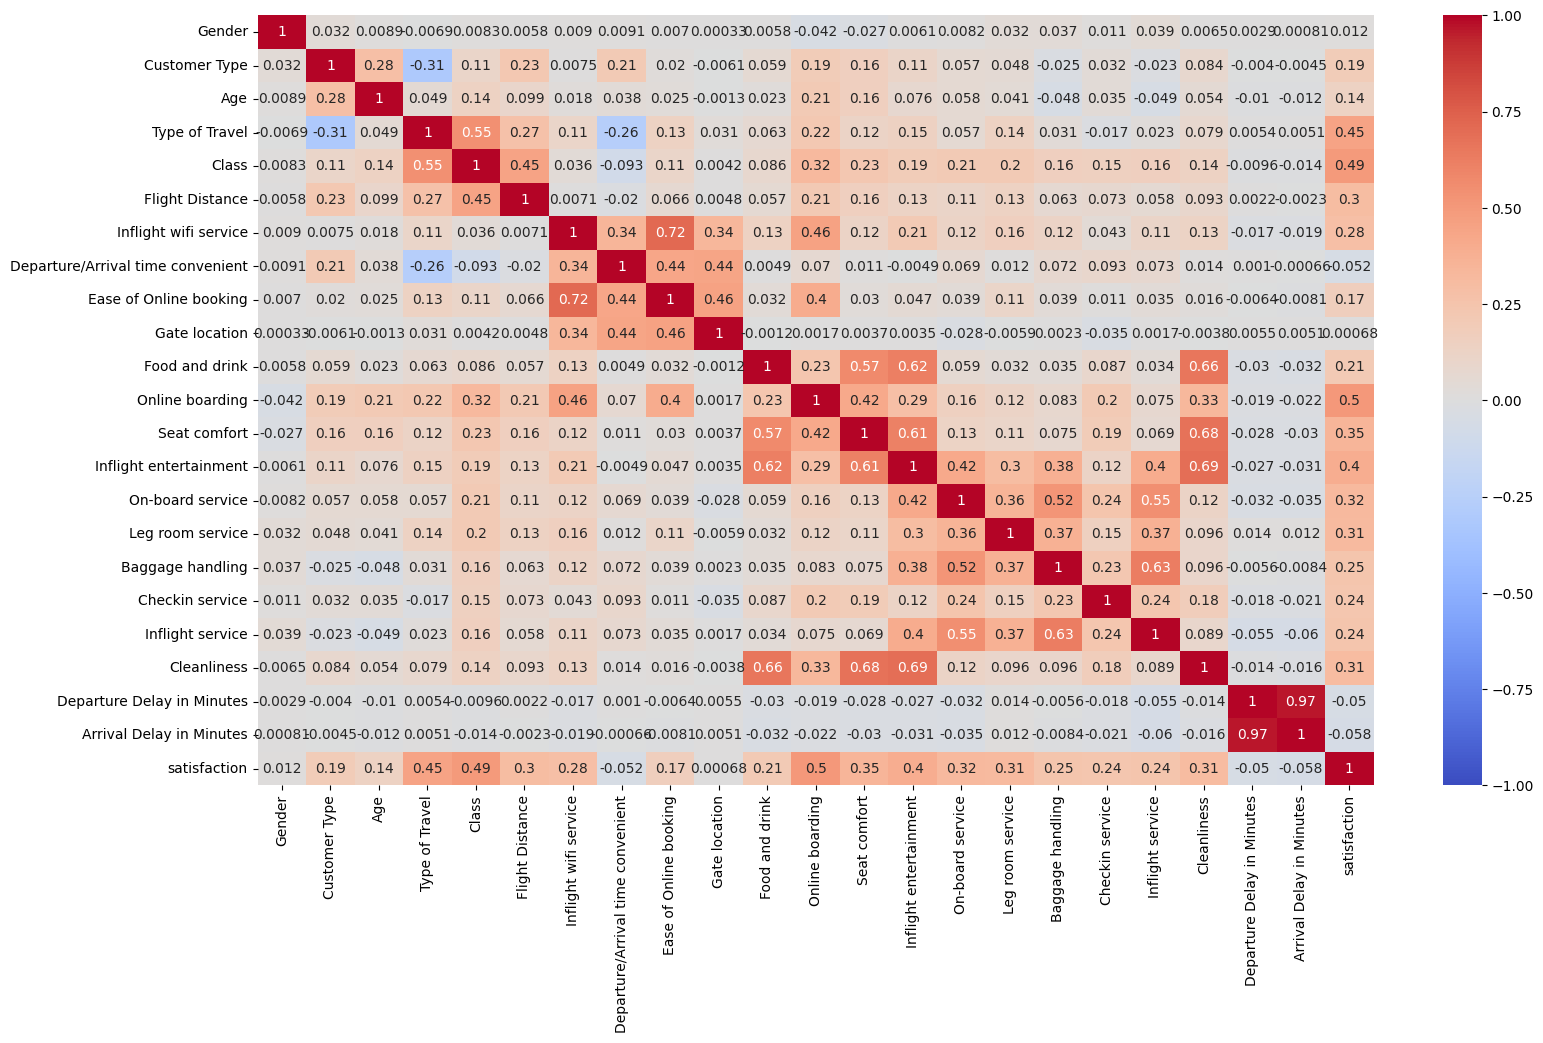

In [11]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(clean_data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

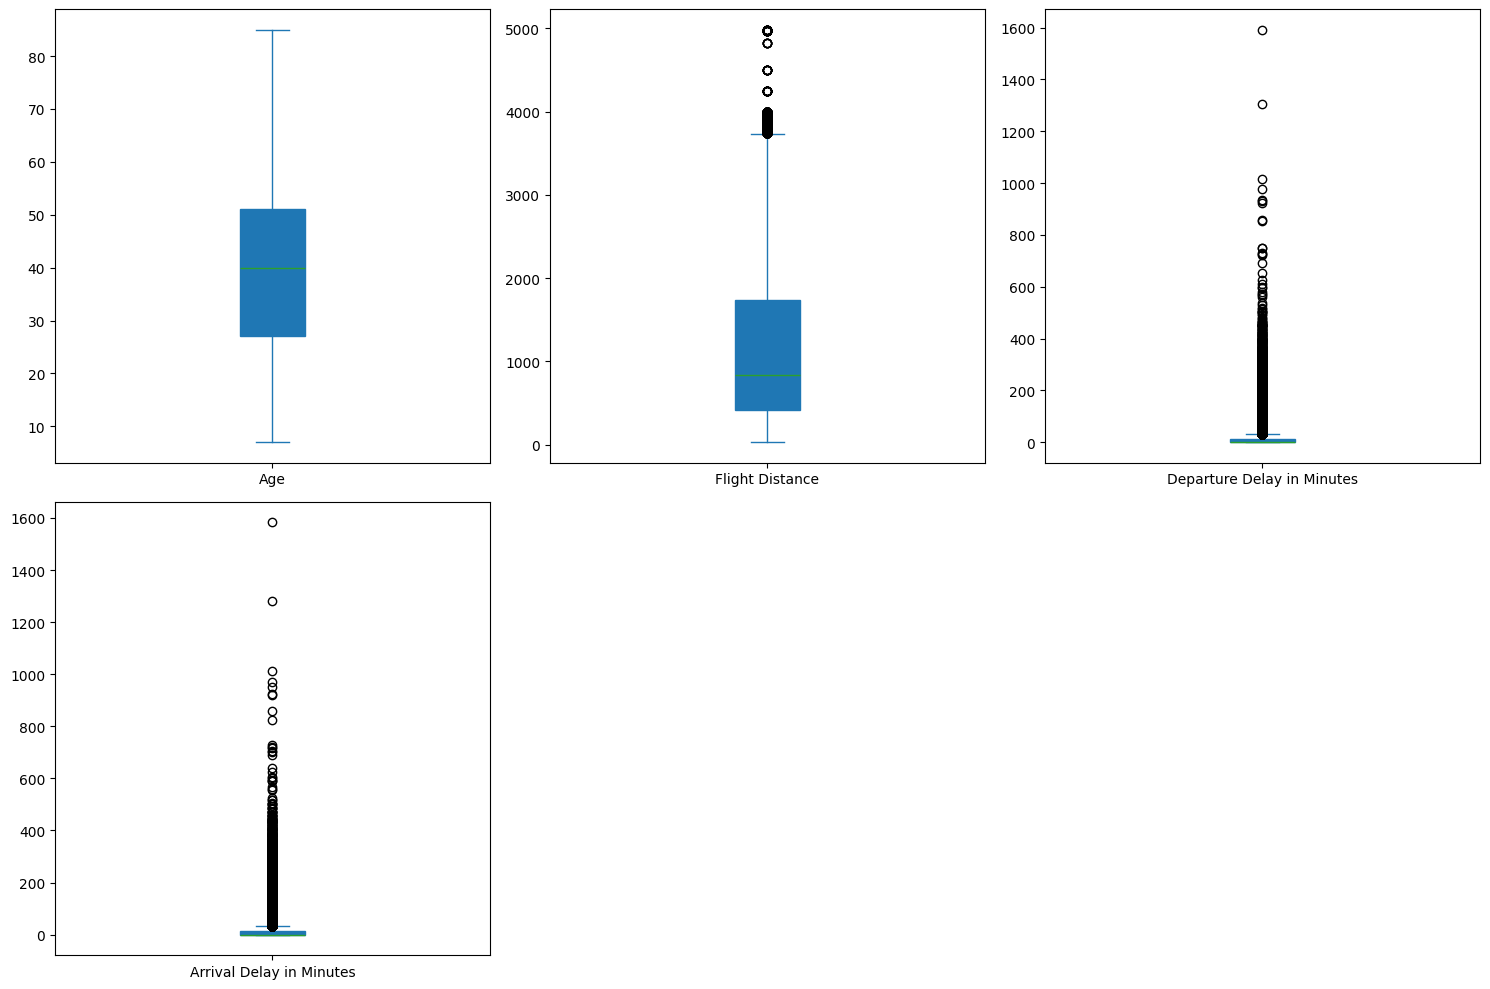

In [12]:
# List of variables of interest
variables_of_interest = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Create boxplots for each specified variable
clean_data[variables_of_interest].plot(kind="box", subplots=True, layout=(2, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\395194874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=train_data,x='satisfaction', palette='hls')


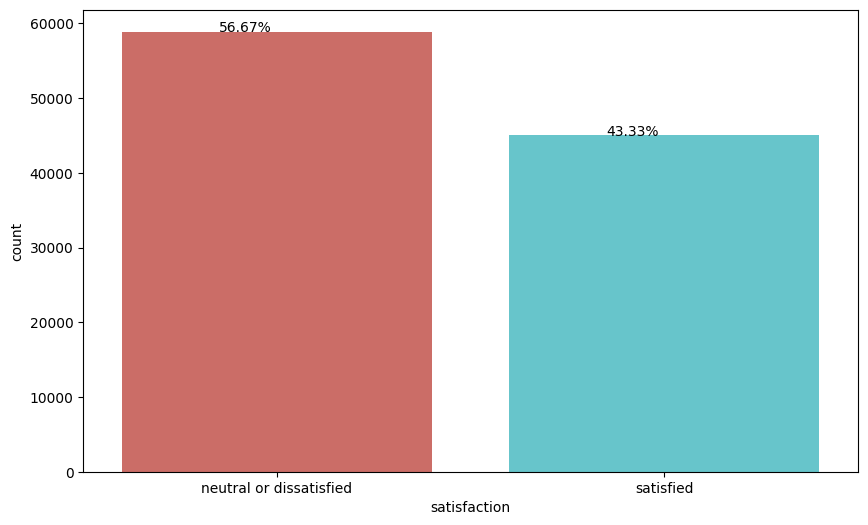

In [13]:
# Proportion of 'neutral or dissatisfied' and 'satisfied'
plt.figure(figsize = (10,6))
x=sns.countplot(data=train_data,x='satisfaction', palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/train_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> Nearly the same percentage, but in general less 'satisfied'

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\2554086111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=train_data,x='Gender', palette='hls')


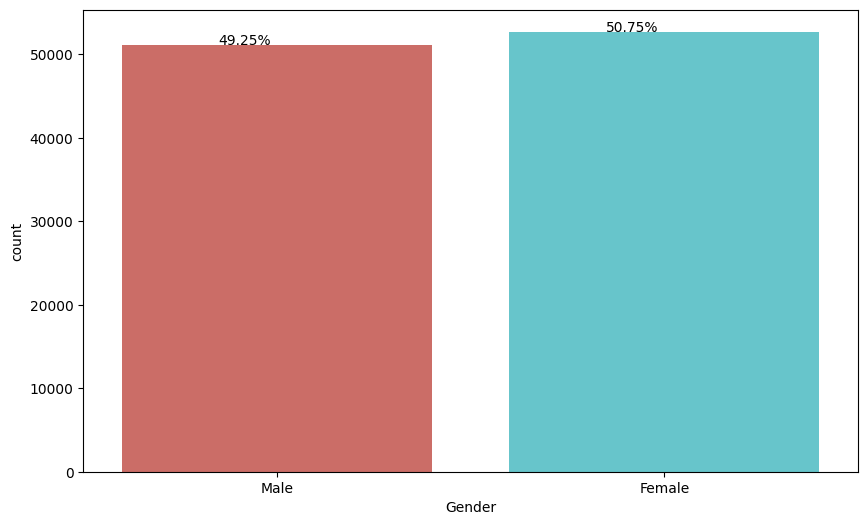

In [14]:
# gender proportion
plt.figure(figsize = (10,6))
x=sns.countplot(data=train_data,x='Gender', palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/train_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> Nearly the same percentage of males and females

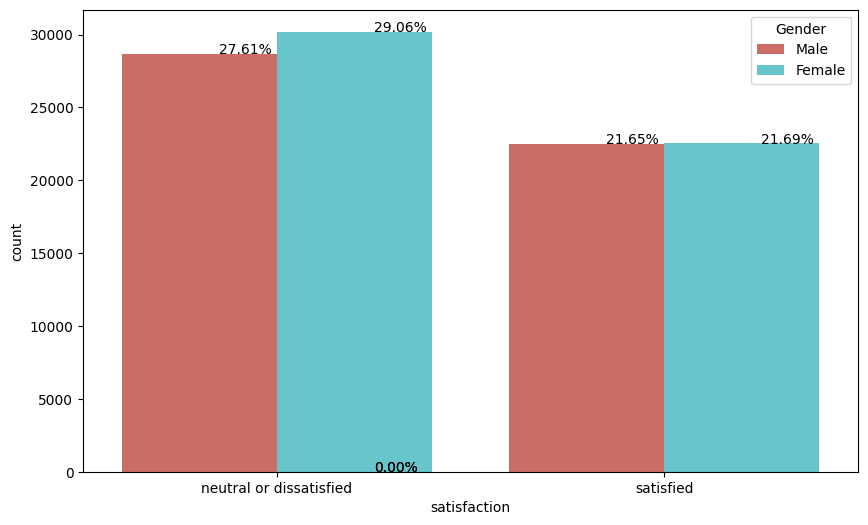

In [15]:
# Does gender affect satisfaction?
plt.figure(figsize = (10,6))
x=sns.countplot(data=train_data,x='satisfaction',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/train_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> Gender doesn't affect the passengers' satisfaction

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\4253526563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,x='Customer Type',palette='hls')


<Axes: xlabel='Customer Type', ylabel='count'>

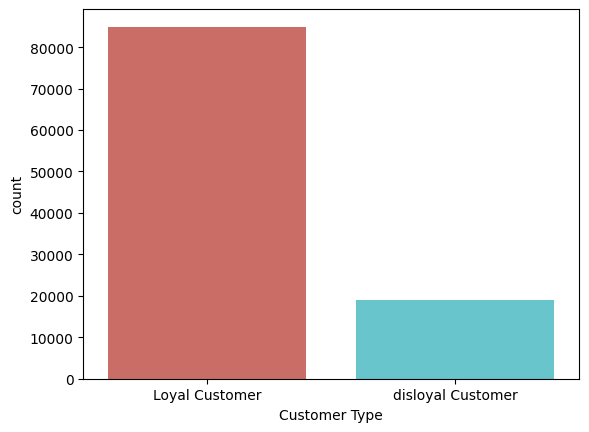

In [16]:
# Proportion of Loyal Customers and Disloyal Customers
sns.countplot(data=train_data,x='Customer Type',palette='hls')
# ---> About 80% of customers are 'Loyal Customer'

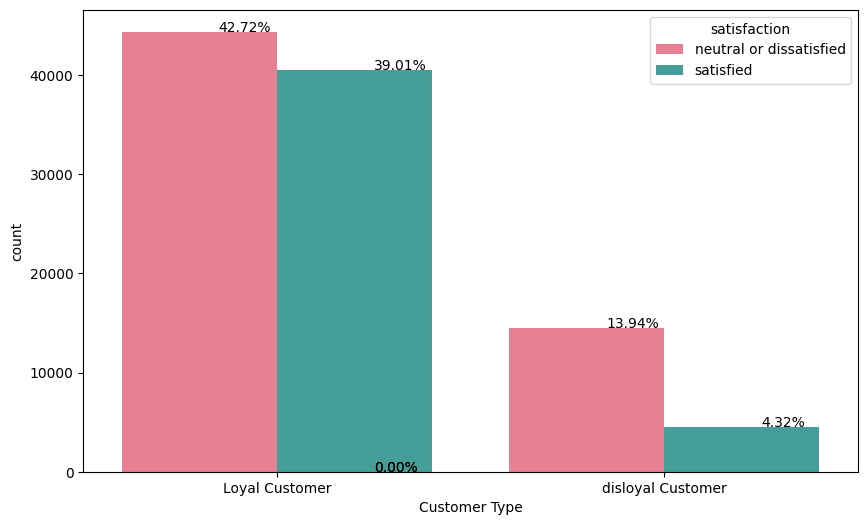

In [17]:
# Does loyalty affect satisfaction?
plt.figure(figsize = (10,6))
x=sns.countplot(data=train_data,x='Customer Type',hue='satisfaction',palette='husl')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/train_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# difference between neutral/dissatsified loyal customers and satsified loyal customers is 3.71
# while difference between neutral/dissatsified disloyal customers and satsified disloyal customers is 9.62 
# ---> dispoyal customers tend to be dissatisfied a little bit more than loyal customers

<Figure size 1000x600 with 0 Axes>

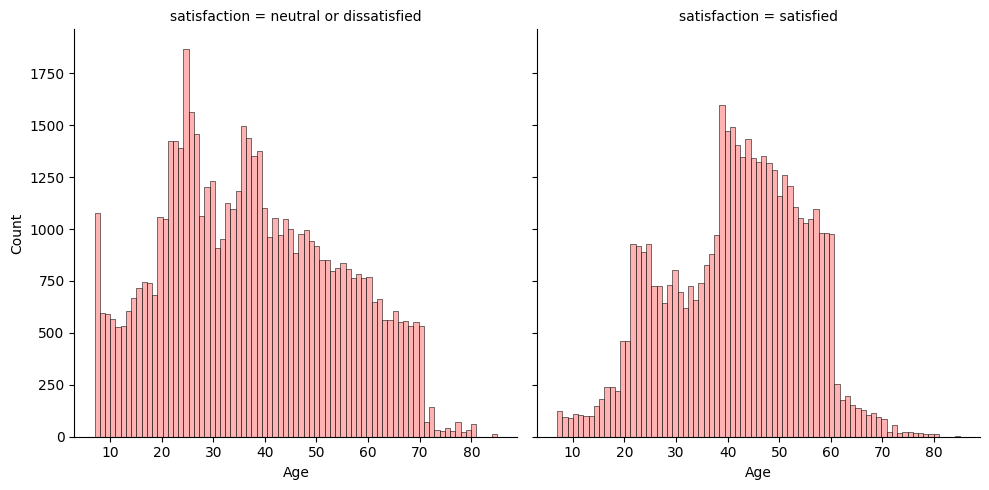

In [18]:
# Does age affect satisfaction?
plt.figure(figsize = (10,6))
sns.displot(data=train_data,x='Age',col='satisfaction', color='#ff9999')
plt.show()
# ---> people aged from 23 to 28 and 34 to 39 tend to be more dissatisfied while people aged from 39 to 45 tend to be more satisfied
# ---> customers aged between 60 and 70 tend to be more disatsfied

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\2762248482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=train_data,x='Type of Travel', palette='husl')


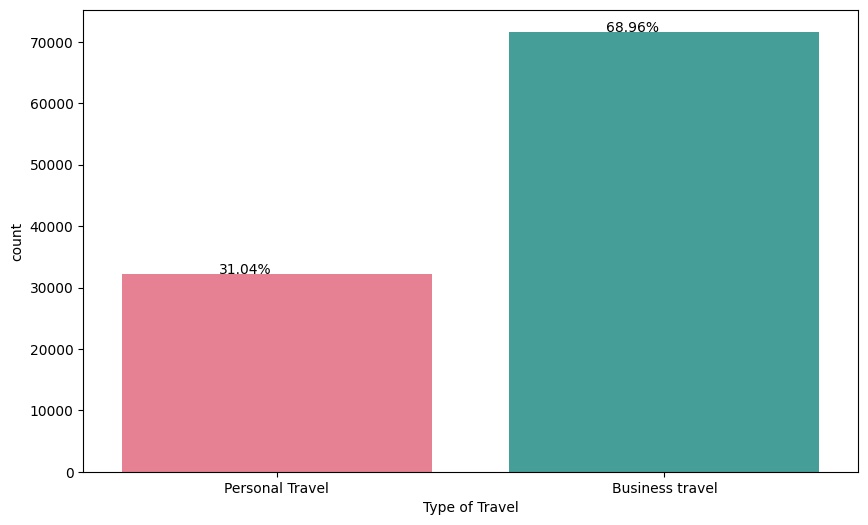

In [19]:
# Proportion of Personal and Business travel
plt.figure(figsize = (10,6))
x=sns.countplot(data=train_data,x='Type of Travel', palette='husl')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/train_data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()
# ---> About 68.96% of customers are business travel

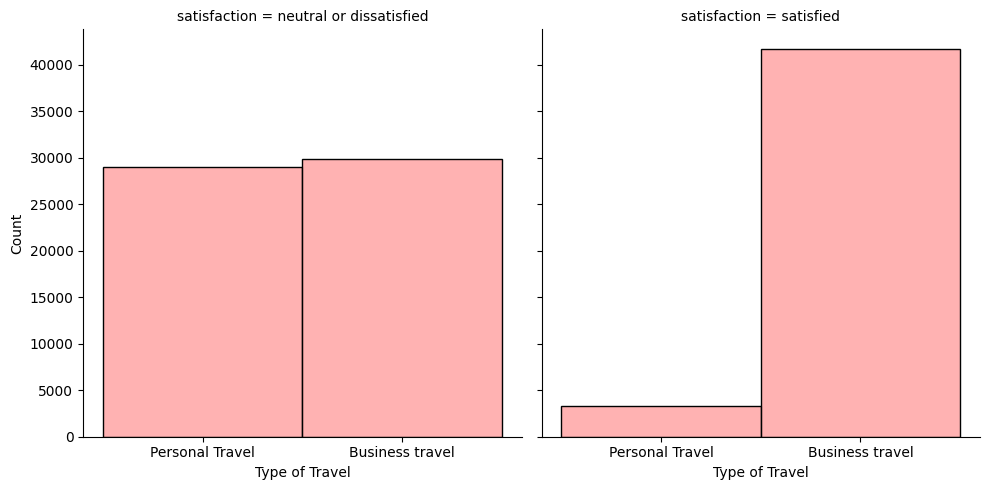

In [20]:
# Does the type of travel affect satisfaction?
sns.displot(data=train_data,x='Type of Travel',col='satisfaction',color='#ff9999')
# ---> Customers who have business type of travel tend to be way more satisfied than those who have personal type of travel

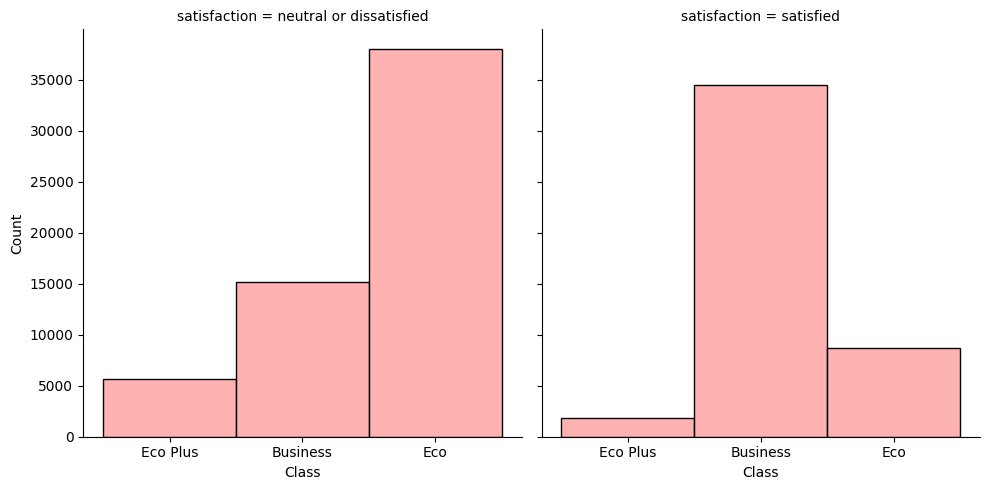

In [21]:
# Does the travel class affect satisfaction?
sns.displot(data=train_data,x='Class',col='satisfaction',color='#ff9999')
# ---> Most of the dissatisfied people had Economoy class while most of the satisfied people had business class

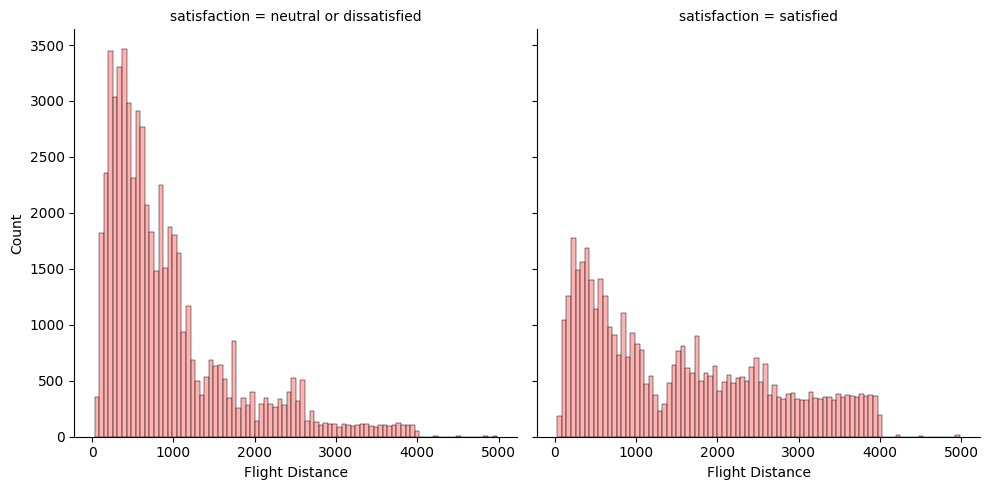

In [22]:
# Does Flight Distance affect satisfaction?
sns.displot(data=train_data,x='Flight Distance',col='satisfaction',color='#ff9999')
# ---> In general, both distributions are rightly-skewed, with most flights having shorter distances
# ---> For 'neutral or dissatisfied' passengers, the peak is very prominent at shorter distances, particularly below 1000 kilometers.
# ---> For 'satisfied' passengers, while there is also a peak at shorter distances, it is less pronounced compared to the 'neutral or dissatisfied' group.

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\868412748.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Arrival Delay in Minutes'] , color='r',shade=True)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\868412748.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Arrival Delay in Minutes'] , color='b',shade=True)


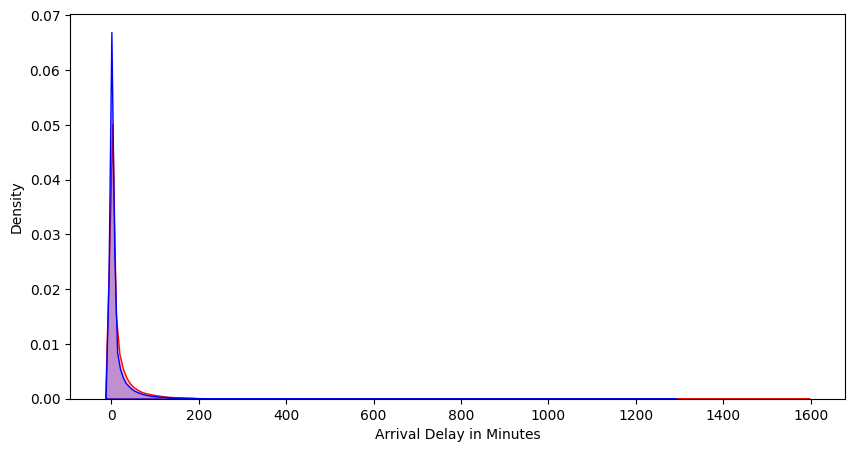

In [23]:
# Does Arrival Delay and Departure Delay affect satisfaction? In the same way?
fig = plt.figure(figsize=(10,5))
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Arrival Delay in Minutes'] , color='r',shade=True)
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Arrival Delay in Minutes'] , color='b',shade=True)

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\1397700561.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Departure Delay in Minutes'] , color='r',shade=True)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\1397700561.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Departure Delay in Minutes'] , color='b',shade=True)


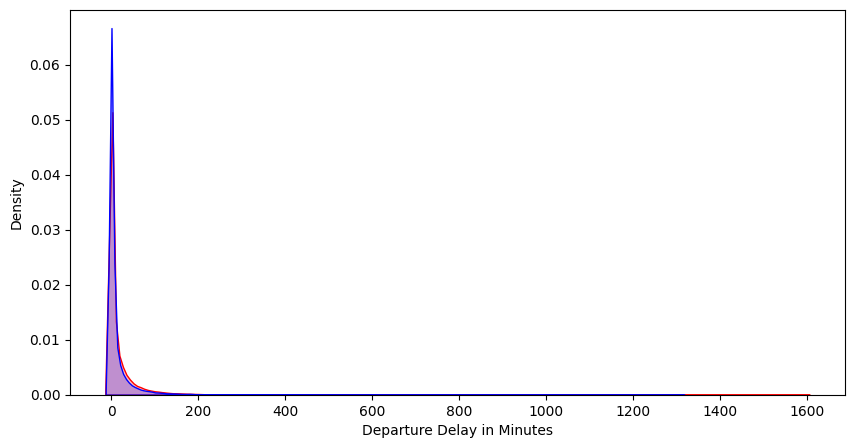

In [24]:
fig = plt.figure(figsize=(10,5))
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Departure Delay in Minutes'] , color='r',shade=True)
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Departure Delay in Minutes'] , color='b',shade=True)
# ---> The two distributions are nearly the same
# ---> Indicates that there isn't a significant difference between the satisfaction levels of customers based on either the arrival delay or the departure delay.

C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\2853298463.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Flight Distance'] , color='r',shade=True)
C:\Users\Tommy\AppData\Local\Temp\ipykernel_23708\2853298463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Flight Distance'] , color='b',shade=True)


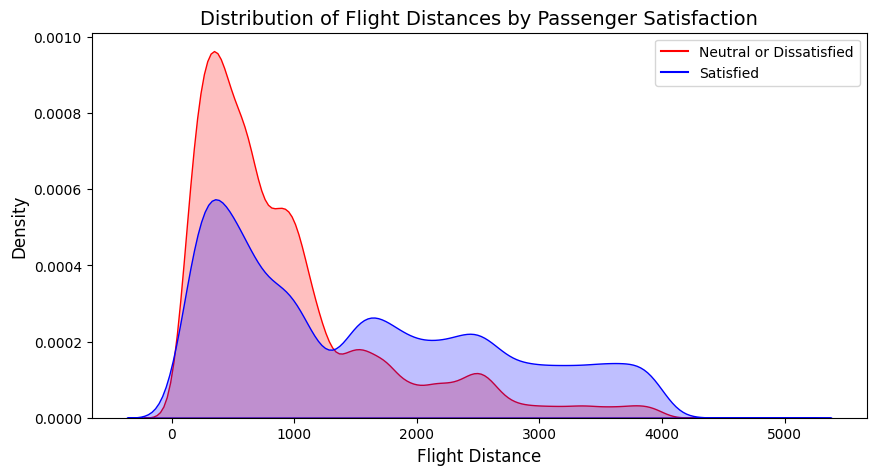

In [25]:
fig = plt.figure(figsize=(10,5))
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'neutral or dissatisfied'), 'Flight Distance'] , color='r',shade=True)
ax=sns.kdeplot(train_data.loc[(train_data['satisfaction'] == 'satisfied'),'Flight Distance'] , color='b',shade=True)
plt.title('Distribution of Flight Distances by Passenger Satisfaction', fontsize=14)
plt.xlabel('Flight Distance', fontsize=12)
plt.ylabel('Density', fontsize=12)
red_patch = plt.Line2D([], [], color='r', label='Neutral or Dissatisfied')
blue_patch = plt.Line2D([], [], color='b', label='Satisfied')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
# ---> The distribution for 'neutral or dissatisfied' passengers (red) shows a higher peak at shorter flight distances compared to 'satisfied' passengers (blue).
# ---> This indicates that a higher proportion of dissatisfied passengers are taking shorter flights.

Text(0.5, 1.0, 'Ease of Online Booking and Passenger Satisfaction')

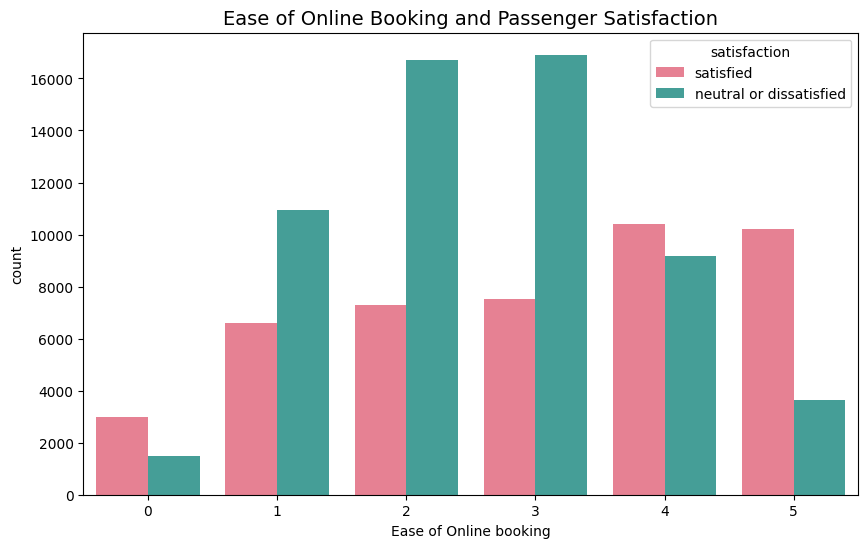

In [26]:
# Extract specific colors from the 'husl' palette
husl_palette = sns.color_palette("husl", 2)
palette = {'neutral or dissatisfied': husl_palette[1], 'satisfied': husl_palette[0]}

# Ease of Online Banking represents the satisfaction of online booking platforms (0 indicates the lowest satisfaction while 5 indicates the highest satisfaction)
# Does Ease of Online Booking affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Ease of Online booking',hue='satisfaction',palette=palette)
plt.title('Ease of Online Booking and Passenger Satisfaction', fontsize=14)
# ---> For lower ease of booking ratings (0-3), there are more 'neutral or dissatisfied' passengers compared to 'satisfied' passengers.
# ---> For the rank of 4, 'satisfied' passengers tend to have a little more than the 'neutral or dissatisfied'
# ---> For the rank of 5, 'satisfied' passengers tend to have much more than the 'neutral or dissatisfied'

Text(0.5, 1.0, 'Check-in Service and Passenger Satisfaction')

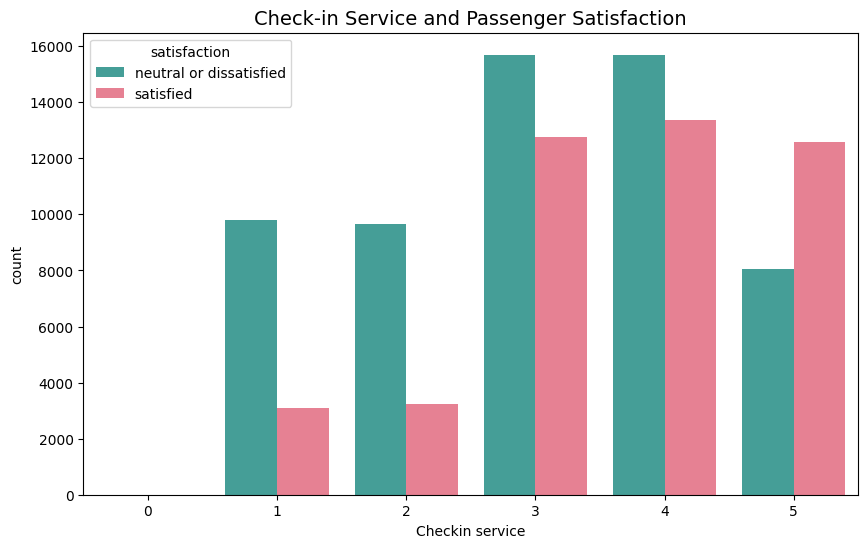

In [27]:
# Does check-in service affect satisfaction?
# 0 indicates the lowest satisfaction while 5 indicates the highest satisfaction
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Checkin service',hue='satisfaction',palette=palette)
plt.title('Check-in Service and Passenger Satisfaction', fontsize=14)
# ---> For lower check-in service ratings (1-2), there are more 'neutral or dissatisfied' passengers compared to 'satisfied' passengers. Likewise.

Text(0.5, 1.0, 'Online Boarding and Passenger Satisfaction')

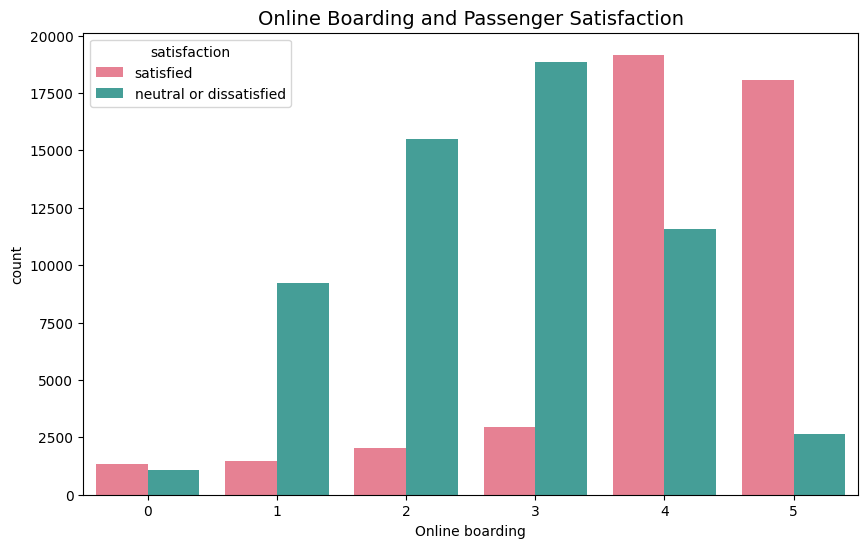

In [28]:
# Does online boarding affect satisfaction?
# 0 indicates the lowest satisfaction while 5 indicates the highest satisfaction
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Online boarding',hue='satisfaction',palette=palette)
plt.title('Online Boarding and Passenger Satisfaction', fontsize=14)
# ---> For lower online boarding ratings (1-3), there are significantly more 'neutral or dissatisfied' passengers compared to 'satisfied' passengers.
# ---> Especially at online boarding rating 5, the number of satisfied passengers is noticeably higher than the number of dissatisfied passengers.

Text(0.5, 1.0, 'Gate Location and Passenger Satisfaction')

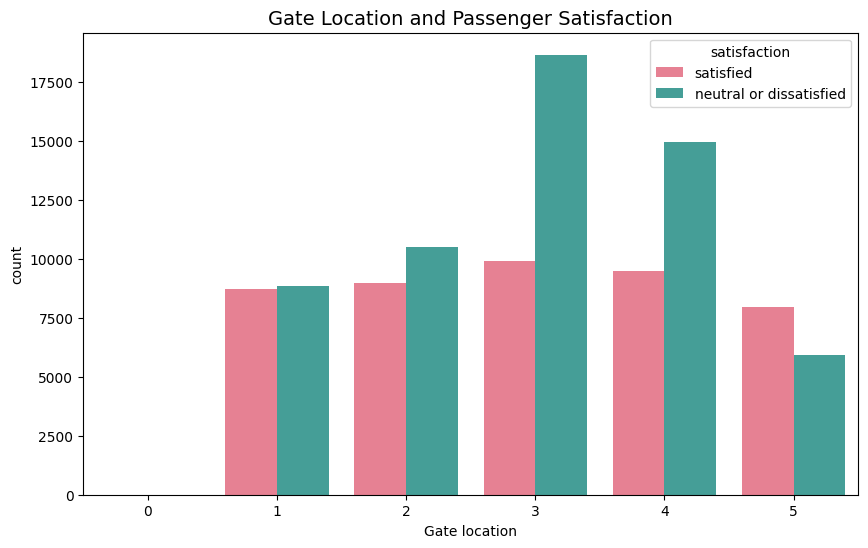

In [29]:
# Does gate location affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Gate location',hue='satisfaction',palette=palette)
plt.title('Gate Location and Passenger Satisfaction', fontsize=14)
# ---> satsfaction level of gate location doesn't seem to affect satisfaction level of the airline

Text(0.5, 1.0, 'Departure/Arrival time convenient and Passenger Satisfaction')

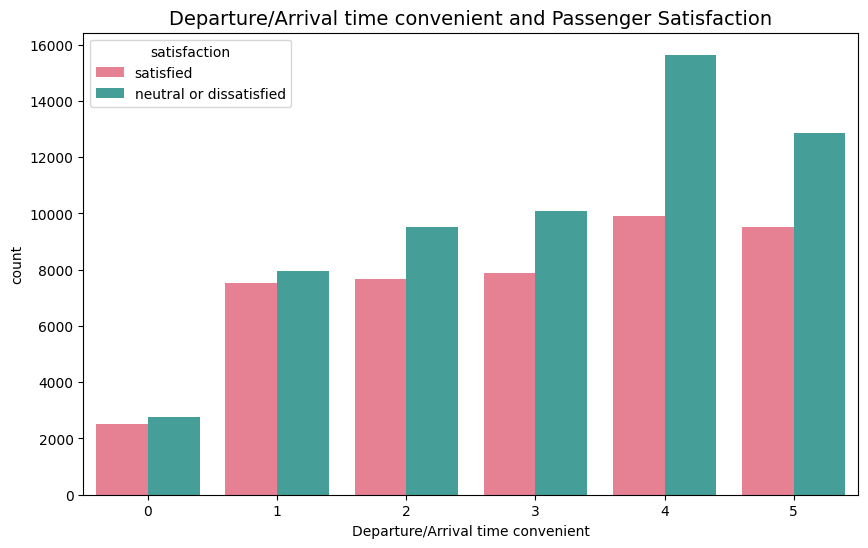

In [30]:
# Does Departure/Arrival time convenient affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Departure/Arrival time convenient',hue='satisfaction',palette=palette)
plt.title('Departure/Arrival time convenient and Passenger Satisfaction', fontsize=14)
# ---> satsfaction level of Departure/Arrival time convenient doesn't seem to affect satisfaction level of the airline

Text(0.5, 1.0, 'On-board Service and Passenger Satisfaction')

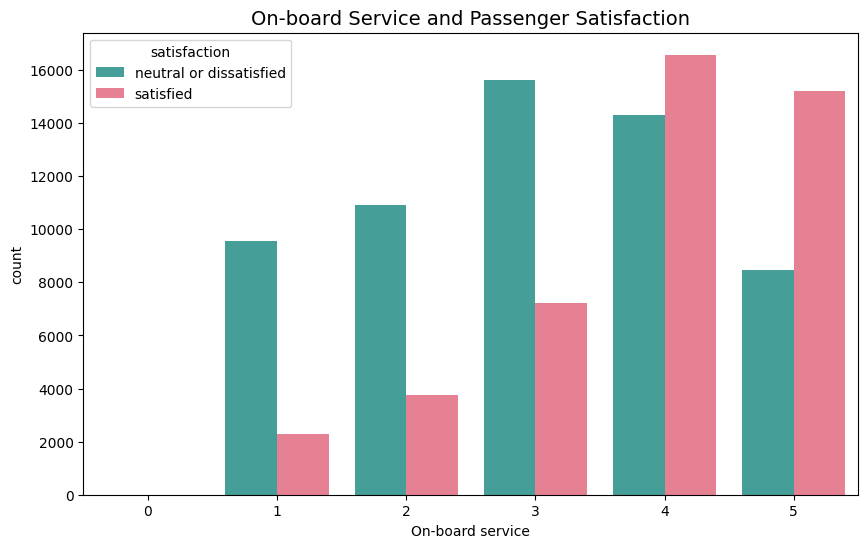

In [31]:
# Does on-board service affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='On-board service',hue='satisfaction',palette=palette)
plt.title('On-board Service and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with On-board Service the more satisfied with the airline

Text(0.5, 1.0, 'Seat Comfort and Passenger Satisfaction')

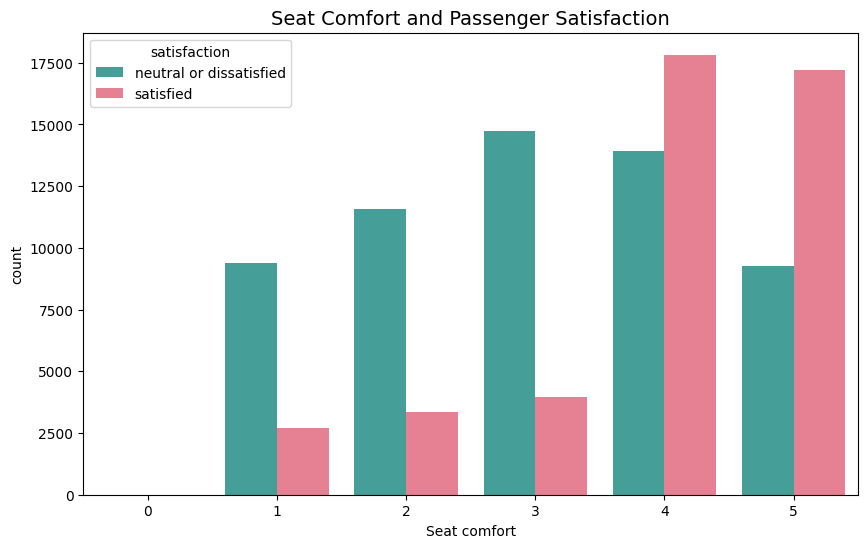

In [32]:
# Does seat comfort affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Seat comfort',hue='satisfaction',palette=palette)
plt.title('Seat Comfort and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with Seat Comfort the more satisfied with the airline

Text(0.5, 1.0, 'Leg Room Service and Passenger Satisfaction')

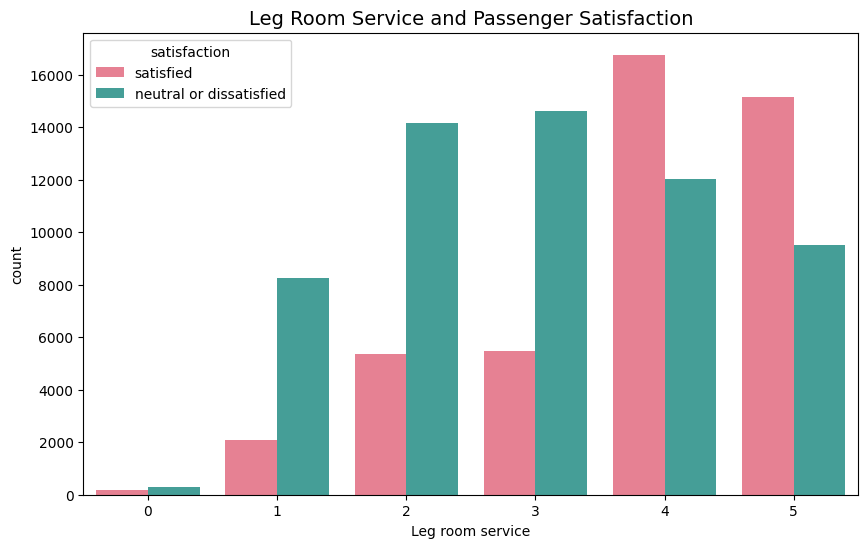

In [33]:
# Does Leg Room Service affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Leg room service',hue='satisfaction',palette=palette)
plt.title('Leg Room Service and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with Leg Room Service the more satisfied with the airline

Text(0.5, 1.0, 'Cleanliness and Passenger Satisfaction')

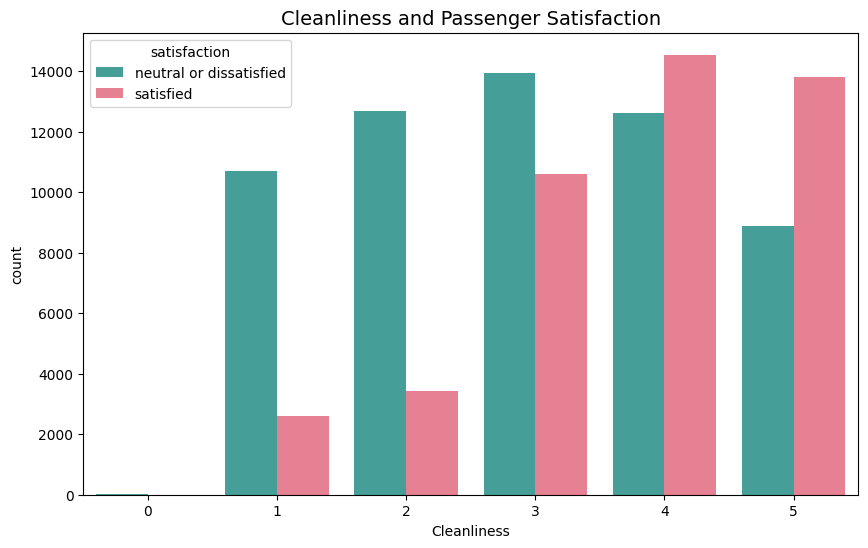

In [34]:
# Does Cleanliness affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Cleanliness',hue='satisfaction',palette=palette)
plt.title('Cleanliness and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with Cleanliness the more satisfied with the airline

Text(0.5, 1.0, 'Food & Drink and Passenger Satisfaction')

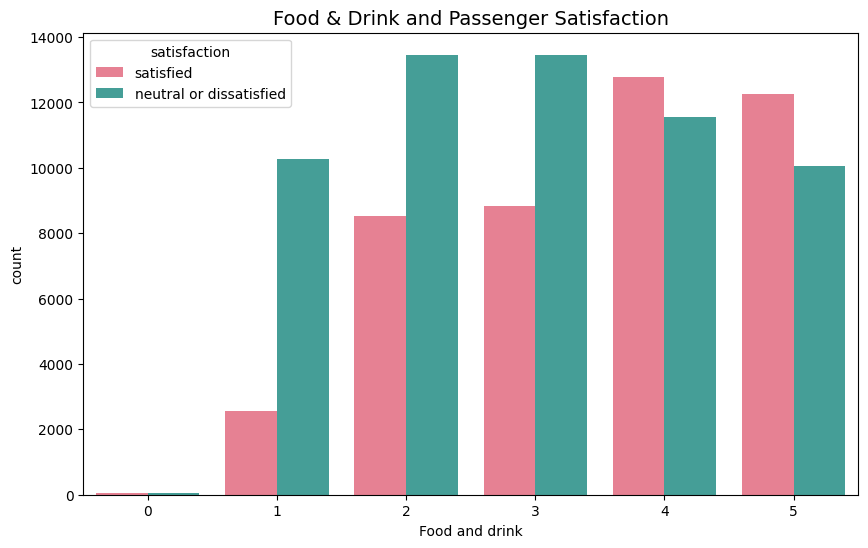

In [35]:
# Does Food and Drink affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Food and drink',hue='satisfaction',palette=palette)
plt.title('Food & Drink and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with Food & Drink the more satisfied with the airline

Text(0.5, 1.0, 'In-flight Service and Passenger Satisfaction')

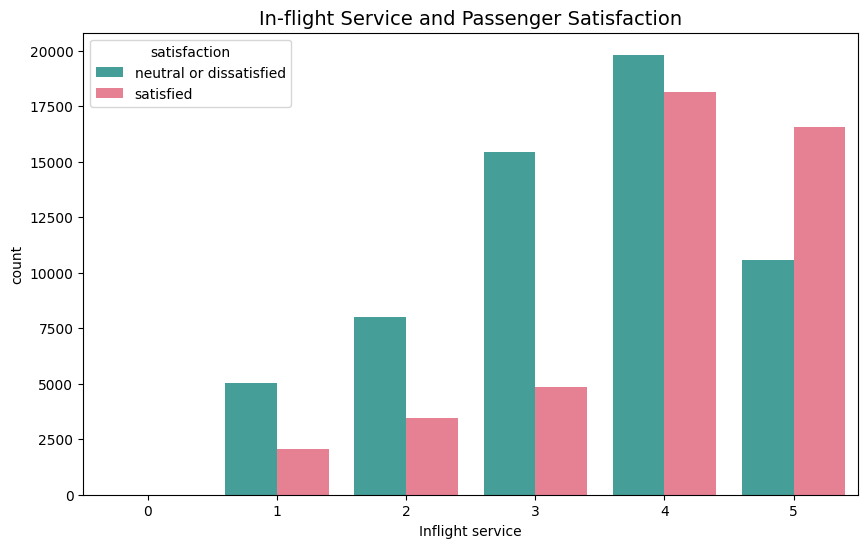

In [36]:
# Does In-flight Service affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Inflight service',hue='satisfaction',palette=palette)
plt.title('In-flight Service and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with In-flight Wifi service the more satisfied with the airline

Text(0.5, 1.0, 'In-flight Wifi Service and Passenger Satisfaction')

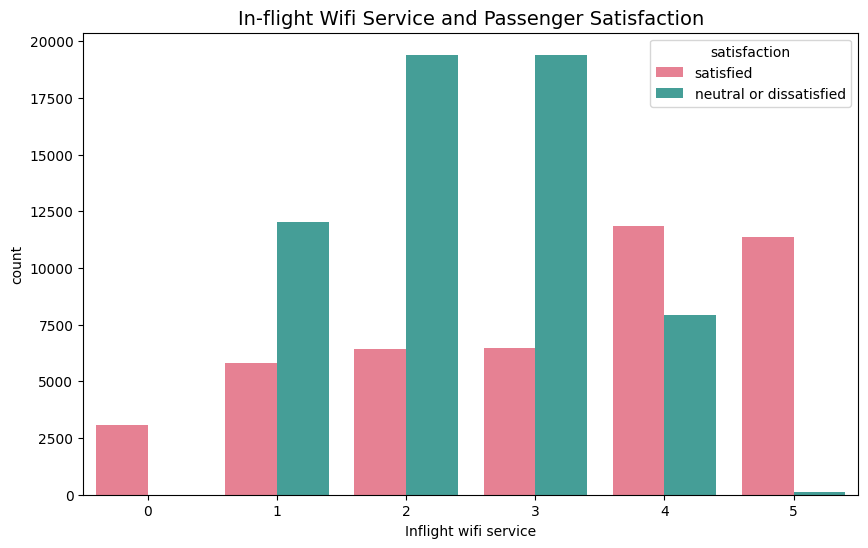

In [37]:
# Does In-flight Wifi Service affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Inflight wifi service',hue='satisfaction',palette=palette)
plt.title('In-flight Wifi Service and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with In-flight Wifi service the more satisfied with the airline

Text(0.5, 1.0, 'In-flight Entertainment and Passenger Satisfaction')

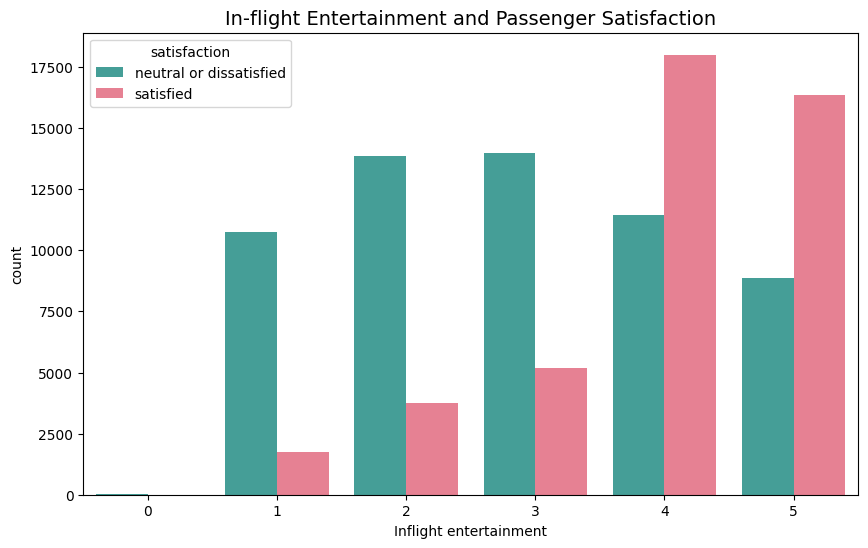

In [38]:
# Does In-flight Entertainment affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Inflight entertainment',hue='satisfaction',palette=palette)
plt.title('In-flight Entertainment and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with In-flight Entertainment the more satisfied with the airline

Text(0.5, 1.0, 'Baggage Handling and Passenger Satisfaction')

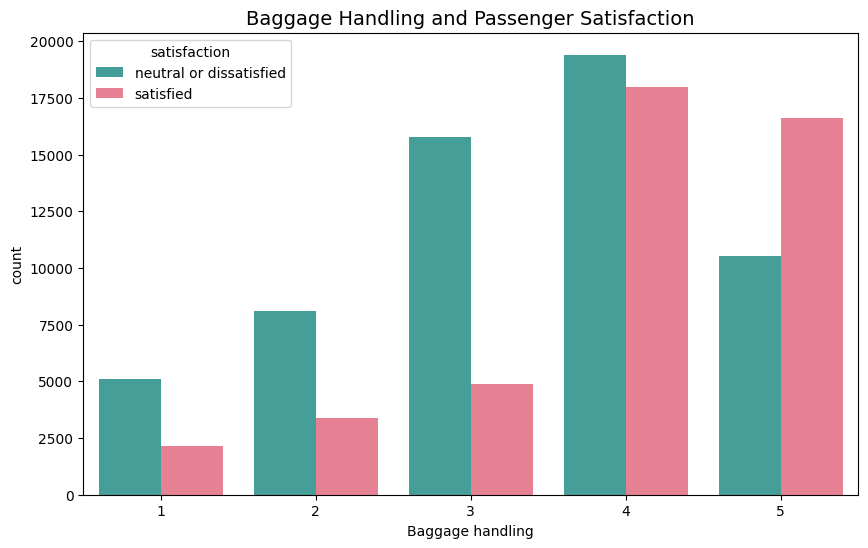

In [39]:
# Does Baggage Handling affect satisfaction?
plt.figure(figsize = (10,6))
sns.countplot(data=train_data,x='Baggage handling',hue='satisfaction',palette=palette)
plt.title('Baggage Handling and Passenger Satisfaction', fontsize=14)
# ---> The more satisfied the customer with Baggage Handling the more satisfied with the airline

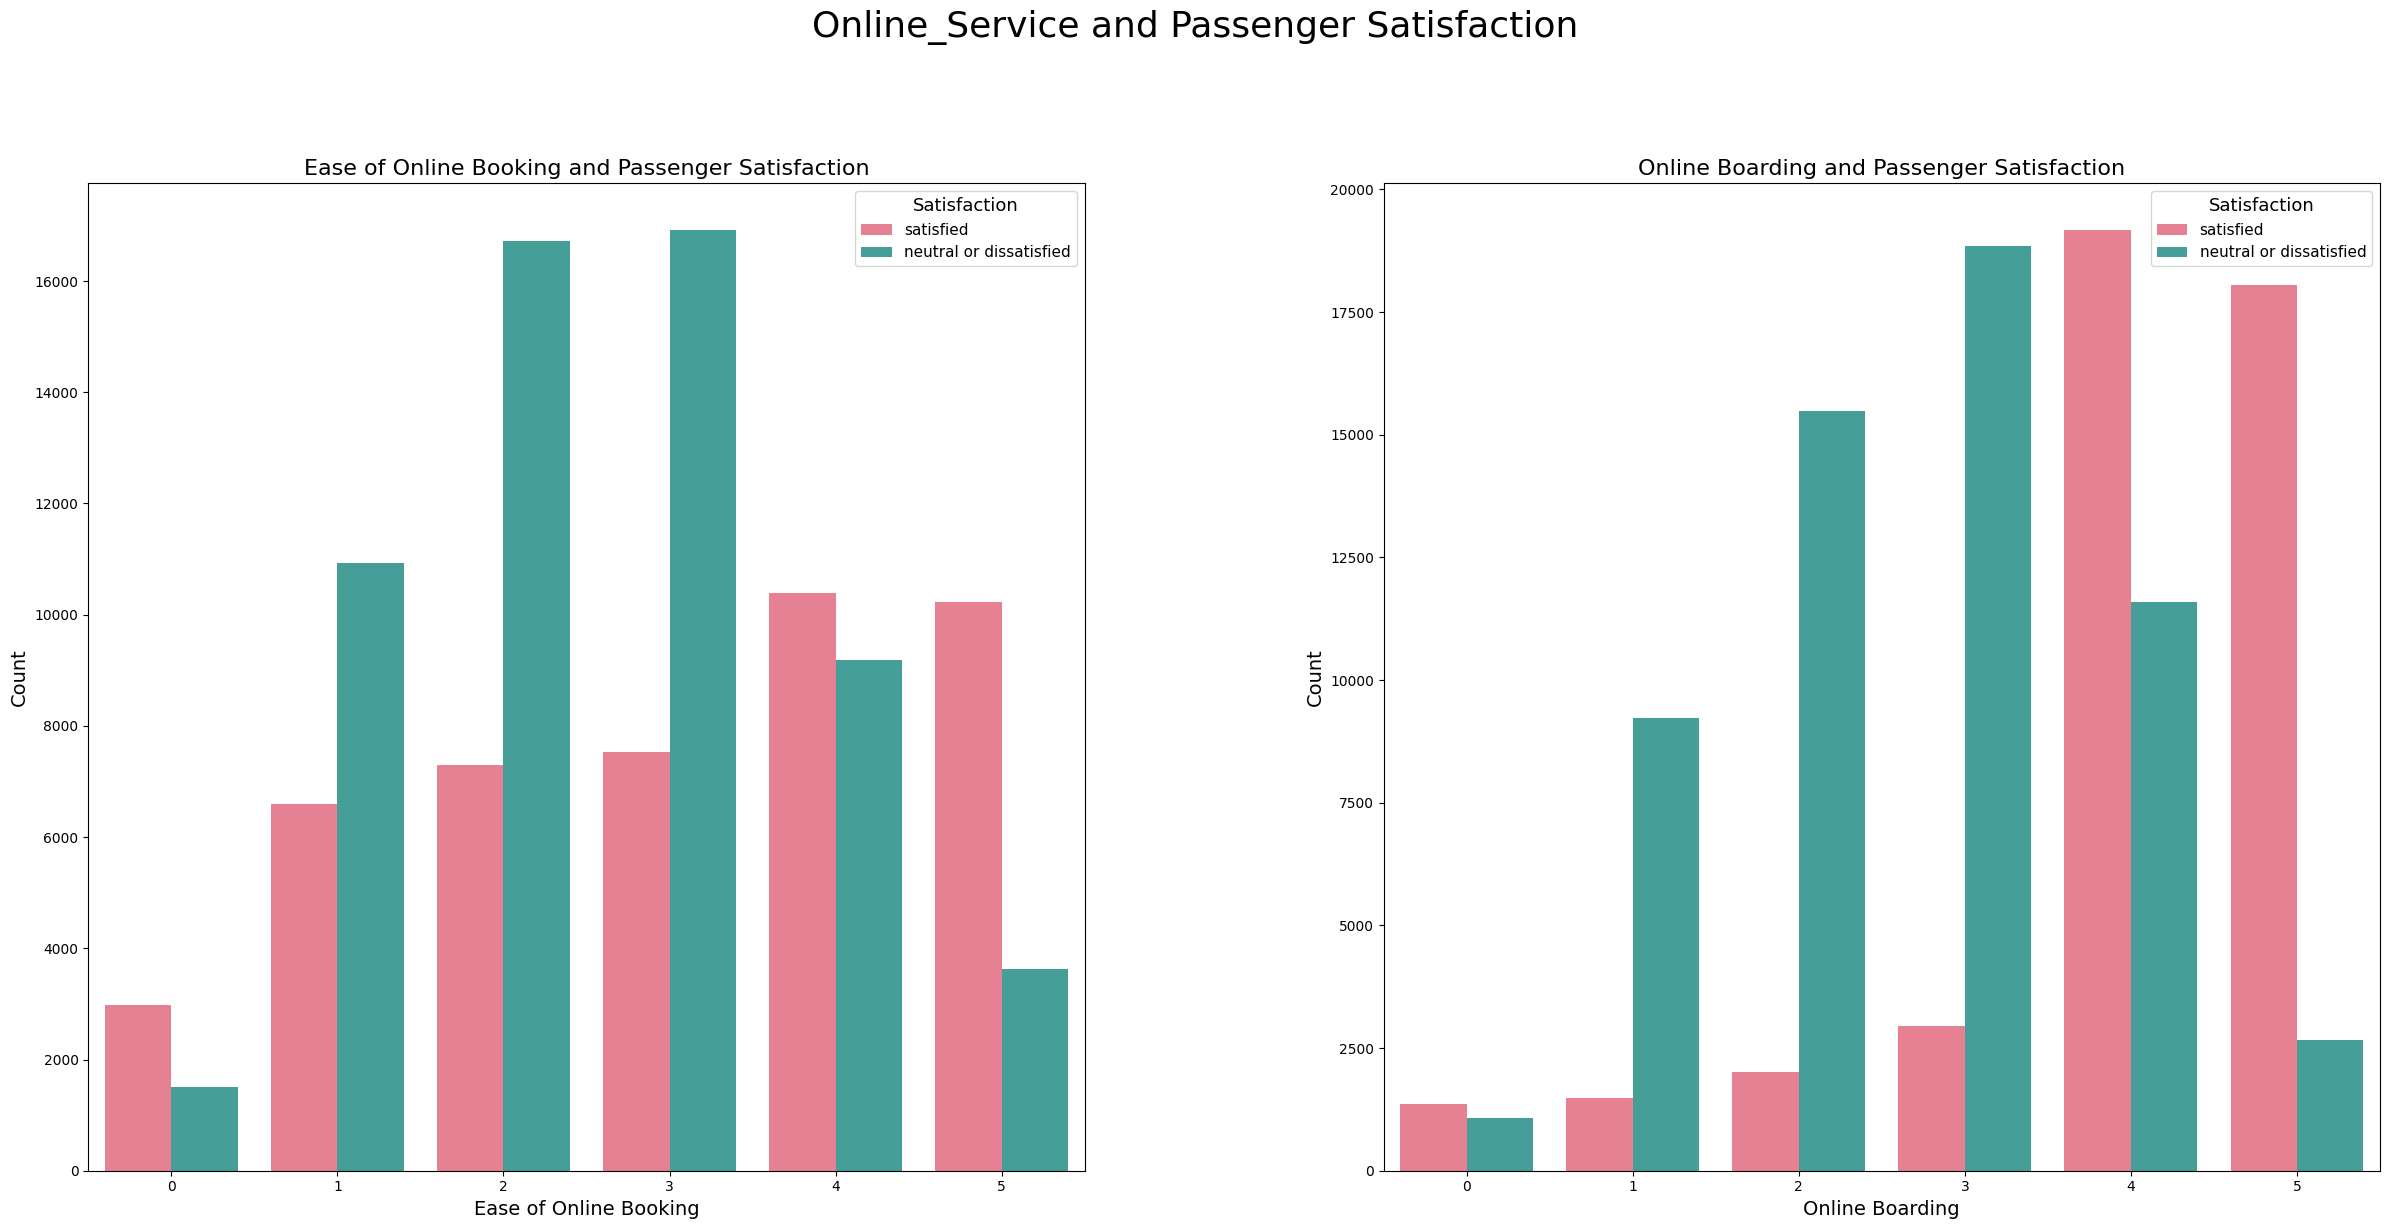

In [40]:
# Extract specific colors from the 'husl' palette
husl_palette = sns.color_palette("husl", 2)
palette = {'neutral or dissatisfied': husl_palette[1], 'satisfied': husl_palette[0]}

# Create a figure with a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Add a main title to the figure
fig.suptitle('Online_Service and Passenger Satisfaction', fontsize=26, y=1.02)

# Plot Ease of Online Booking and Passenger Satisfaction in the first subplot
sns.countplot(data=train_data, x='Ease of Online booking', hue='satisfaction', palette=palette, ax=axes[0])
axes[0].set_title('Ease of Online Booking and Passenger Satisfaction', fontsize=16)
axes[0].set_xlabel('Ease of Online Booking', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Satisfaction', title_fontsize='13', fontsize='11')

# Plot Online Boarding and Passenger Satisfaction in the second subplot
sns.countplot(data=train_data, x='Online boarding', hue='satisfaction', palette=palette, ax=axes[1])
axes[1].set_title('Online Boarding and Passenger Satisfaction', fontsize=16)
axes[1].set_xlabel('Online Boarding', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Satisfaction', title_fontsize='13', fontsize='11')

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()







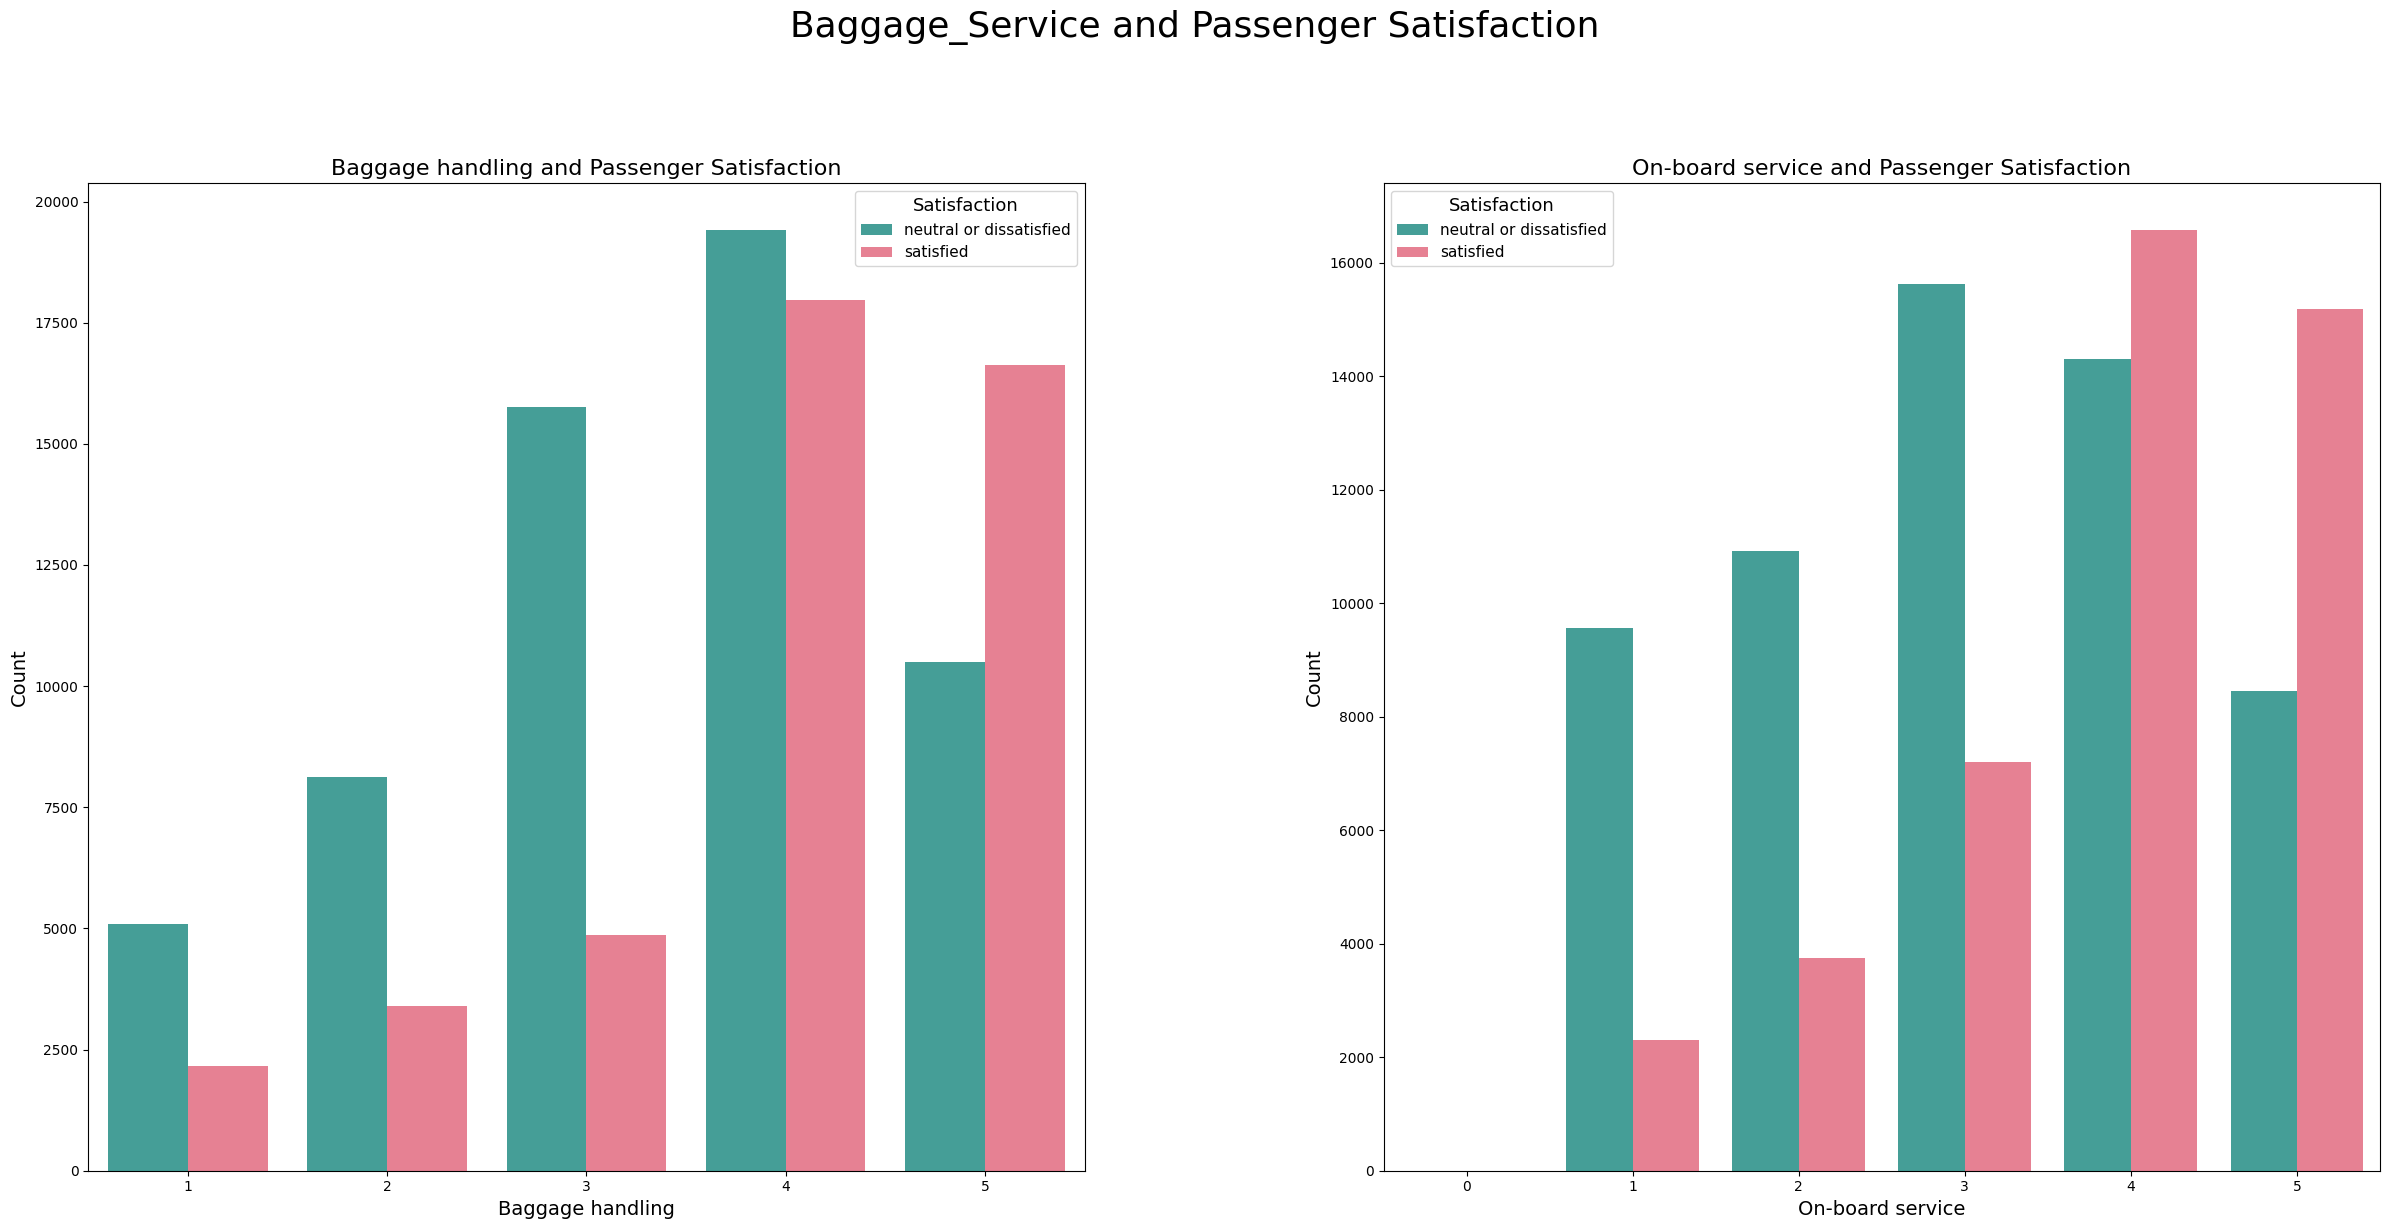

In [41]:
# Extract specific colors from the 'husl' palette
husl_palette = sns.color_palette("husl", 2)
palette = {'neutral or dissatisfied': husl_palette[1], 'satisfied': husl_palette[0]}

# Create a figure with a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Add a main title to the figure
fig.suptitle('Baggage_Service and Passenger Satisfaction', fontsize=26, y=1.02)

# Plot Ease of Online Booking and Passenger Satisfaction in the first subplot
sns.countplot(data=train_data, x='Baggage handling', hue='satisfaction', palette=palette, ax=axes[0])
axes[0].set_title('Baggage handling and Passenger Satisfaction', fontsize=16)
axes[0].set_xlabel('Baggage handling', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Satisfaction', title_fontsize='13', fontsize='11')

# Plot Online Boarding and Passenger Satisfaction in the second subplot
sns.countplot(data=train_data, x='On-board service', hue='satisfaction', palette=palette, ax=axes[1])
axes[1].set_title('On-board service and Passenger Satisfaction', fontsize=16)
axes[1].set_xlabel('On-board service', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Satisfaction', title_fontsize='13', fontsize='11')

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

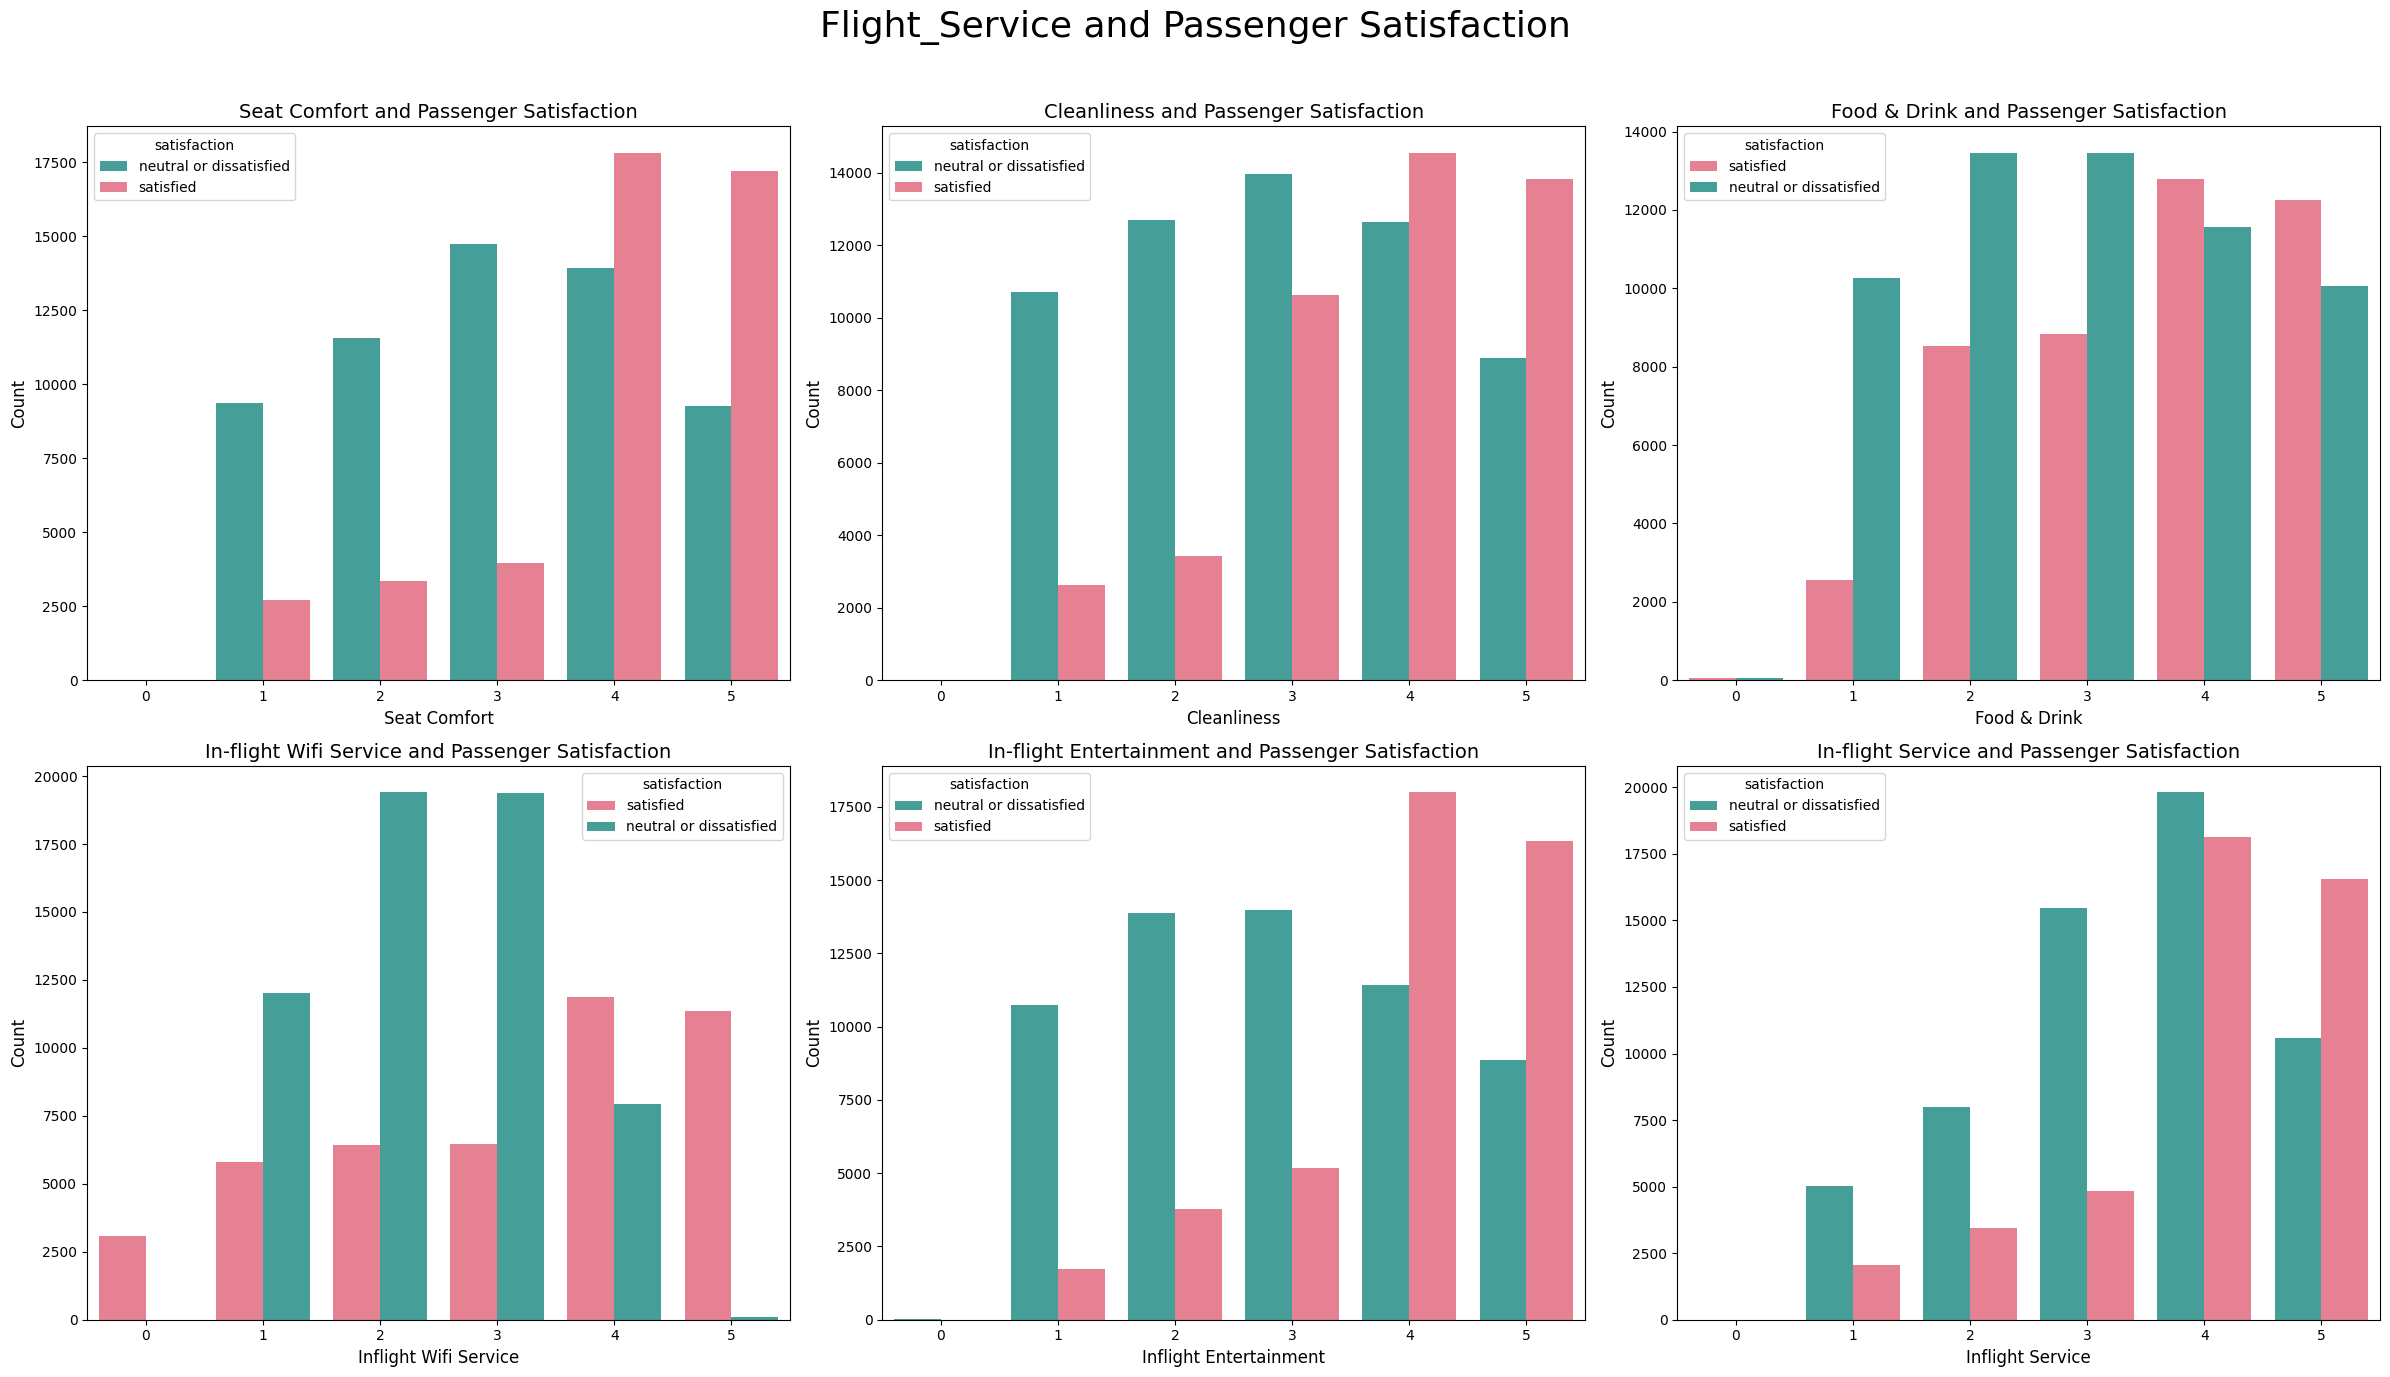

In [42]:

# Extract specific colors from the 'husl' palette
husl_palette = sns.color_palette("husl", 2)
palette = {'neutral or dissatisfied': husl_palette[1], 'satisfied': husl_palette[0]}

# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(24, 14))

# Add a main title to the figure
fig.suptitle('Flight_Service and Passenger Satisfaction', fontsize=26, y=0.98)

# Plot each chart in a specific subplot
sns.countplot(data=train_data, x='Seat comfort', hue='satisfaction', palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Seat Comfort and Passenger Satisfaction', fontsize=14)
axes[0, 0].set_xlabel('Seat Comfort', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

sns.countplot(data=train_data, x='Cleanliness', hue='satisfaction', palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Cleanliness and Passenger Satisfaction', fontsize=14)
axes[0, 1].set_xlabel('Cleanliness', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

sns.countplot(data=train_data, x='Food and drink', hue='satisfaction', palette=palette, ax=axes[0, 2])
axes[0, 2].set_title('Food & Drink and Passenger Satisfaction', fontsize=14)
axes[0, 2].set_xlabel('Food & Drink', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)

sns.countplot(data=train_data, x='Inflight wifi service', hue='satisfaction', palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('In-flight Wifi Service and Passenger Satisfaction', fontsize=14)
axes[1, 0].set_xlabel('Inflight Wifi Service', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

sns.countplot(data=train_data, x='Inflight entertainment', hue='satisfaction', palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('In-flight Entertainment and Passenger Satisfaction', fontsize=14)
axes[1, 1].set_xlabel('Inflight Entertainment', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

sns.countplot(data=train_data, x='Inflight service', hue='satisfaction', palette=palette, ax=axes[1, 2])
axes[1, 2].set_title('In-flight Service and Passenger Satisfaction', fontsize=14)
axes[1, 2].set_xlabel('Inflight Service', fontsize=12)
axes[1, 2].set_ylabel('Count', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [43]:
### Conclusion
# The more satisfied the customer with one of the following features the more satisfied in general:
# ('Departure and Arrival Time Convenience', 'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service'
# 'Seat Comfort', 'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service'
# 'In-flight Entertainment' ,and 'Baggage Handling')

In [44]:
### Feature Engineering

In [6]:
# Drop the 'Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes' 
# due to low effects on satisfaction and 'Departure Delay in Minutes' have high correlation with 'Arrival Delay in Minutes', so drop 'Departure Delay in Minutes'
final_data = clean_data.drop(columns=['Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes','Arrival Delay in Minutes','Gender'])

In [7]:
# Create composite variables, due to high correlation inside the variables
final_data['Flight_Service'] = final_data[['Cleanliness', 'Food and drink', 'Inflight entertainment', 'Seat comfort', 'Inflight wifi service', 'Inflight service']].mean(axis=1)
final_data['Online_Service'] = final_data[['Ease of Online booking', 'Online boarding']].mean(axis=1)
final_data['Baggage_Service'] = final_data[['Baggage handling', 'On-board service']].mean(axis=1)


In [8]:
# Drop the columns that be composited and 'Type of Travel' which has high correlation with 'Class' 
final_data = final_data.drop(columns = ['Cleanliness', 'Food and drink', 'Inflight entertainment', 'Seat comfort','Ease of Online booking', 'Online boarding', 'Inflight wifi service','Baggage handling', 'Inflight service', 'On-board service', 'Type of Travel'])

In [9]:
## helps in normalizing distributions that are highly skewed. 
##  This transformation can make the data more suitable for statistical analysis and modeling. (deal with outliers)


# Apply log transformation to 'Flight Distance' and 'Arrival Delay in Minutes'
final_data['Log_Flight_Distance'] = np.log1p(final_data['Flight Distance'])  # log1p is used to handle zero values by computing log(1 + x)

# Drop the original 'Flight Distance' and 'Arrival Delay in Minutes' columns
final_data = final_data.drop(columns=['Flight Distance'])


In [49]:
final_data.columns

Index(['Customer Type', 'Age', 'Class', 'Leg room service', 'Checkin service',
       'satisfaction', 'Flight_Service', 'Online_Service', 'Baggage_Service',
       'Log_Flight_Distance'],
      dtype='object')

In [50]:
### Modelling

In [10]:
# split data into X variables and y variable

X = final_data[['Customer Type', 'Age', 'Class', 'Leg room service', 'Checkin service',
        'Flight_Service', 'Online_Service', 'Baggage_Service',
       'Log_Flight_Distance']]
y = final_data['satisfaction']

In [11]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(final_data[['Age','Log_Flight_Distance','Flight_Service', 'Online_Service', 'Baggage_Service']])

array([[0.07692308, 0.52843282, 0.92      , 0.6       , 0.75      ],
       [0.23076923, 0.39579954, 0.24      , 0.6       , 0.25      ],
       [0.24358974, 0.70829975, 0.84      , 0.7       , 0.75      ],
       ...,
       [0.29487179, 0.8187318 , 0.72      , 0.2       , 0.625     ],
       [0.19230769, 0.68202197, 0.16      , 0.2       , 0.375     ],
       [0.25641026, 0.78971225, 0.12      , 0.4       , 0.375     ]])

In [13]:
# Define columns
numeric_columns = ['Age','Log_Flight_Distance','Flight_Service', 'Online_Service', 'Baggage_Service']
categorical_columns = ['Customer Type', 'Class']
ordinal_columns = ['Leg room service', 'Checkin service']

In [14]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns)
    ]
)

In [15]:
# we are going to test 3 models with cross validation to see which ones work best for this data
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()


In [16]:
# Define scoring functions
scoring = {'accuracy': make_scorer(accuracy_score), 
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f1': 'f1'}


In [17]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])

/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [18]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")
print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")
print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")
print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

Random Forest Mean Accuracy: 0.8971979331520238
Random Forest Mean Recall: 0.8552279046771692
Random Forest Mean Precision: 0.901649778972871
Random Forest Mean F1 Score: 0.8778235623771314
KNN Mean Accuracy: 0.8577654913007786
KNN Mean Recall: 0.8009108188555094
KNN Mean Precision: 0.8600928473013397
KNN Mean F1 Score: 0.8294409471834848
Logistic Regression Mean Accuracy: 0.8230215120971597
Logistic Regression Mean Recall: 0.7672249469438335
Logistic Regression Mean Precision: 0.812498475195723
Logistic Regression Mean F1 Score: 0.7892100079324053
Naive Bayes Mean Accuracy: 0.8152257964107882
Naive Bayes Mean Recall: 0.7594244828363829
Naive Bayes Mean Precision: 0.8021611136316817
Naive Bayes Mean F1 Score: 0.780203868095733


In [19]:
print(f"Random Forest Mean F1 Score: {rf_f1}")
print(f"KNN Mean F1 Score: {knn_f1}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

Random Forest Mean F1 Score: 0.8778235623771314
KNN Mean F1 Score: 0.8294409471834848
Logistic Regression Mean F1 Score: 0.7892100079324053
Naive Bayes Mean F1 Score: 0.780203868095733


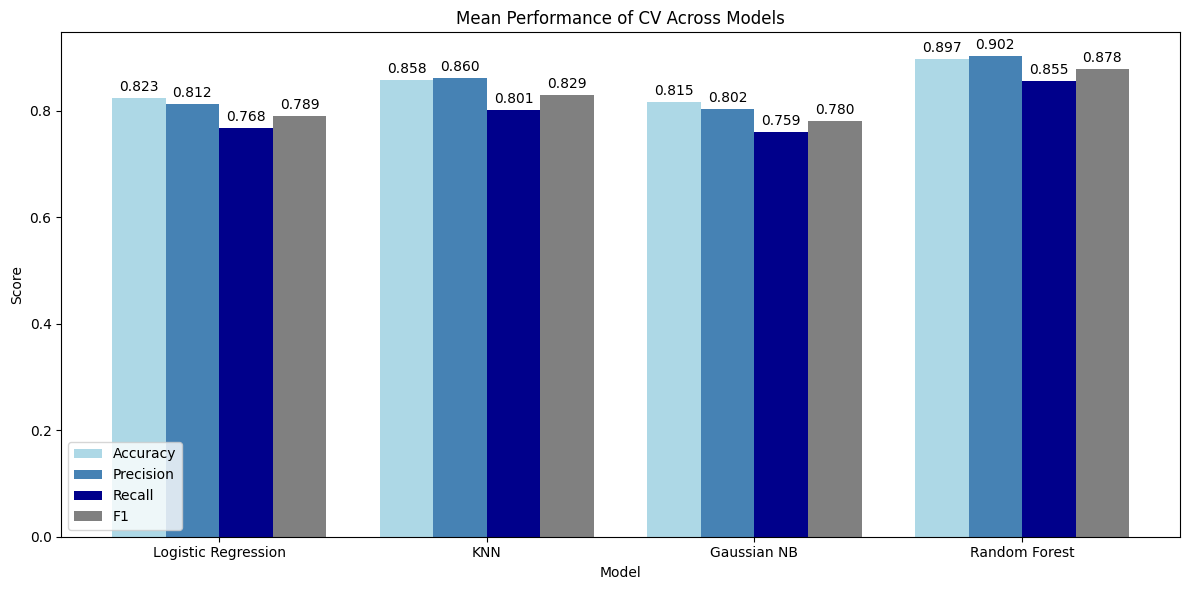

In [60]:
# Collect the scores in a dictionary
scores = {
    'Logistic Regression': {
        'Accuracy': logreg_accuracy,
        'Precision': logreg_precision,
        'Recall': logreg_recall,
        'F1': logreg_f1
    },
    'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1': knn_f1
    },
    'Gaussian NB': {
        'Accuracy': nb_accuracy,
        'Precision': nb_precision,
        'Recall': nb_recall,
        'F1': nb_f1
    },
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1': rf_f1
    }
}

# Data preparation for plotting
models = list(scores.keys())
metrics = list(next(iter(scores.values())).keys())
accuracy_scores = [scores[model]['Accuracy'] for model in models]
precision_scores = [scores[model]['Precision'] for model in models]
recall_scores = [scores[model]['Recall'] for model in models]
f1_scores = [scores[model]['F1'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='lightblue')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='steelblue')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='darkblue')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Mean Performance of CV Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [61]:
## Random Forest

In [62]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with a preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_pipeline.predict(X_test)

In [63]:
# Create a pipeline with a preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _ge

Best hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [64]:
# Build the final Random Forest model using the best hyperparameters
final_classifier = RandomForestClassifier(
    n_estimators=grid_search.best_params_['classifier__n_estimators'],
    max_depth=grid_search.best_params_['classifier__max_depth'],
    min_samples_split=grid_search.best_params_['classifier__min_samples_split'],
    min_samples_leaf=grid_search.best_params_['classifier__min_samples_leaf'],
    random_state=42
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8968304889002952
Final Model Test F1 Score: 0.8785773616250094
Final Model Test Precision: 0.9041106535084311
Final Model Test Recall: 0.8544466475728868


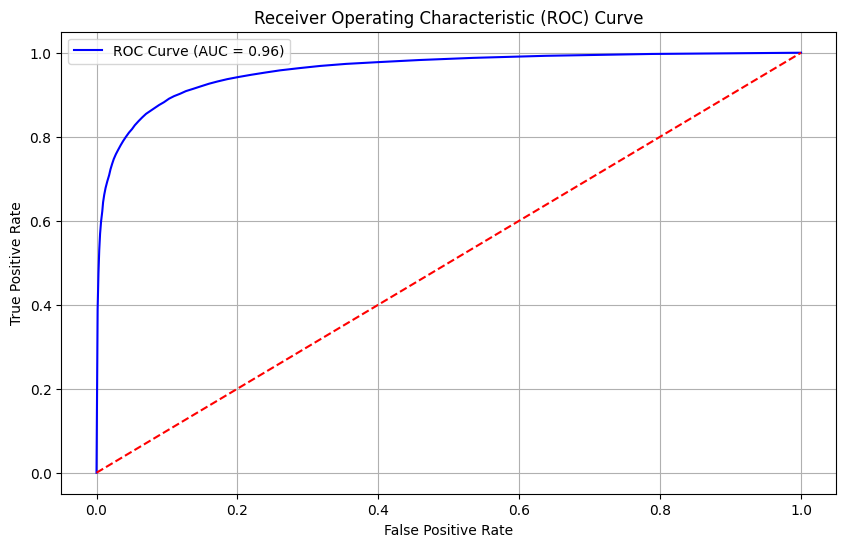

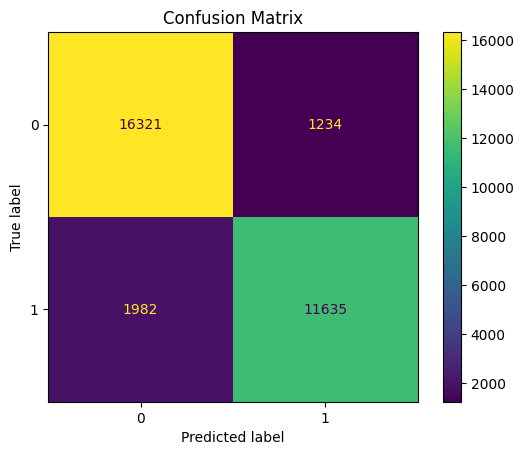

In [65]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [66]:
## KNN 

In [67]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)


In [68]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _ge

Best hyperparameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [69]:
# Build the final KNN model using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8688887463107917
Final Model Test F1 Score: 0.8442632320999885
Final Model Test Precision: 0.8773958498336766
Final Model Test Recall: 0.8135418961592128


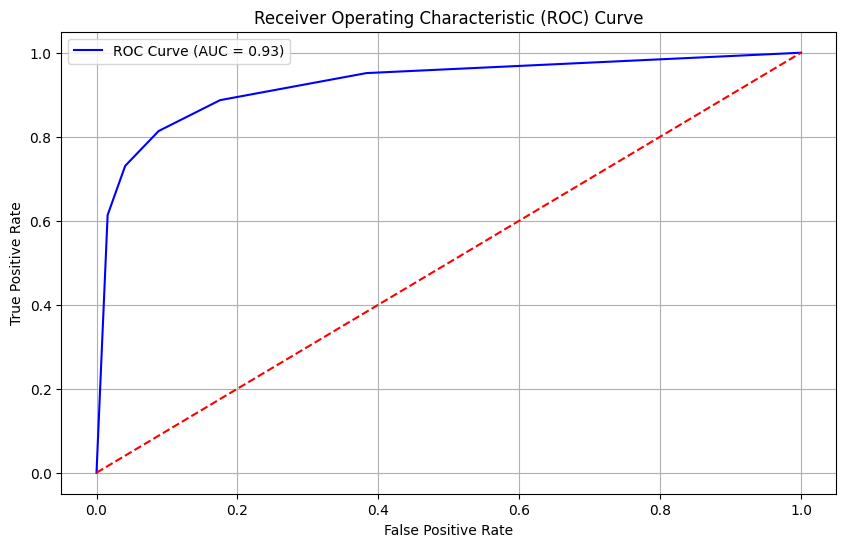

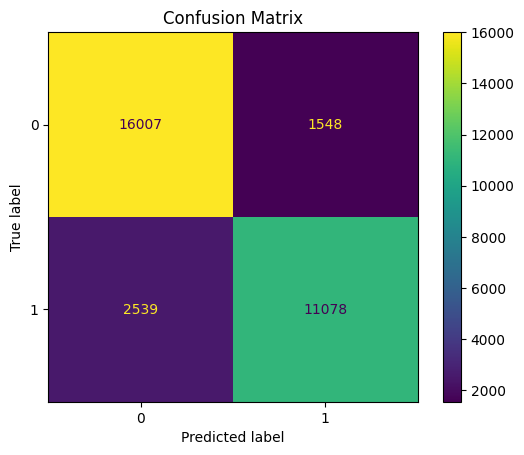

In [70]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [71]:
## Logistic Regression 

In [72]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline with a preprocessor and Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _ge

Best hyperparameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [73]:
# Build the final Logistic Regression model using the best hyperparameters
final_classifier = LogisticRegression(
    C=grid_search.best_params_['classifier__C'],
    penalty=grid_search.best_params_['classifier__penalty'],
    solver=grid_search.best_params_['classifier__solver'],
    max_iter=1000
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8194212755036572
Final Model Test F1 Score: 0.7869497748003482
Final Model Test Precision: 0.8119337706966573
Final Model Test Recall: 0.7634574429022545


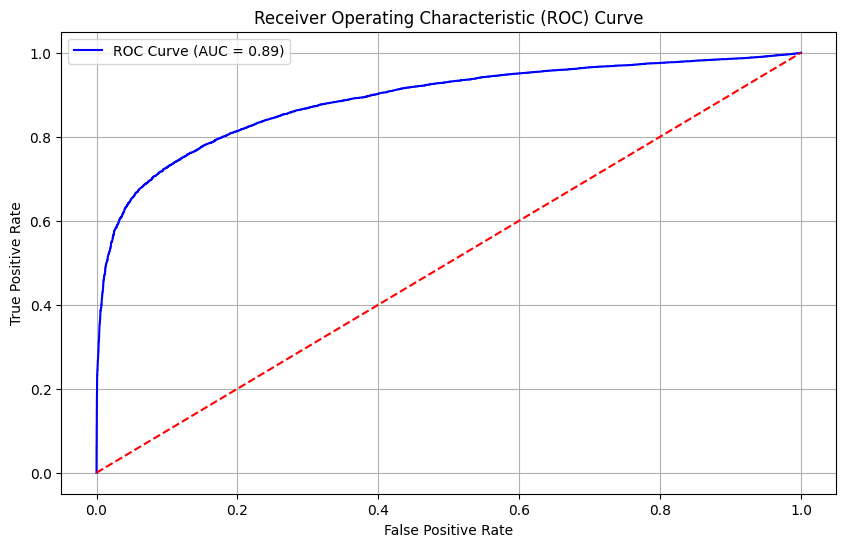

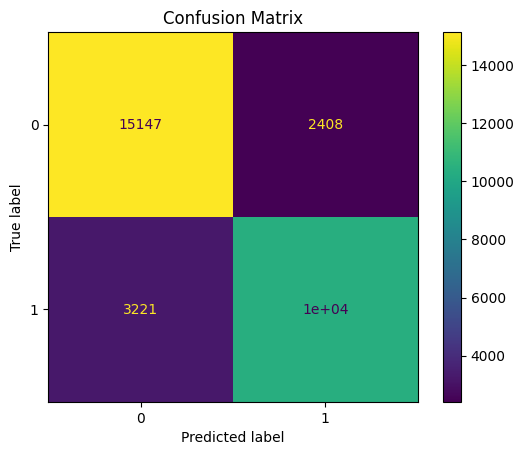

In [74]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


In [75]:
## Naive Bayes 

In [76]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline with a preprocessor and Naive Bayes model
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])


# Define the hyperparameter grid
param_grid = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Naive Bayes:", grid_search.best_params_)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _ge

Best hyperparameters for Naive Bayes: {'classifier__var_smoothing': 1e-09}


c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\Tommy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _ge

In [77]:
# Build the final Naive Bayes model using the best hyperparameters
final_classifier = GaussianNB(var_smoothing=grid_search.best_params_['classifier__var_smoothing'])

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8012960349031182
Final Model Test F1 Score: 0.7643612569428593
Final Model Test Precision: 0.7929591917278396
Final Model Test Recall: 0.737754277741059


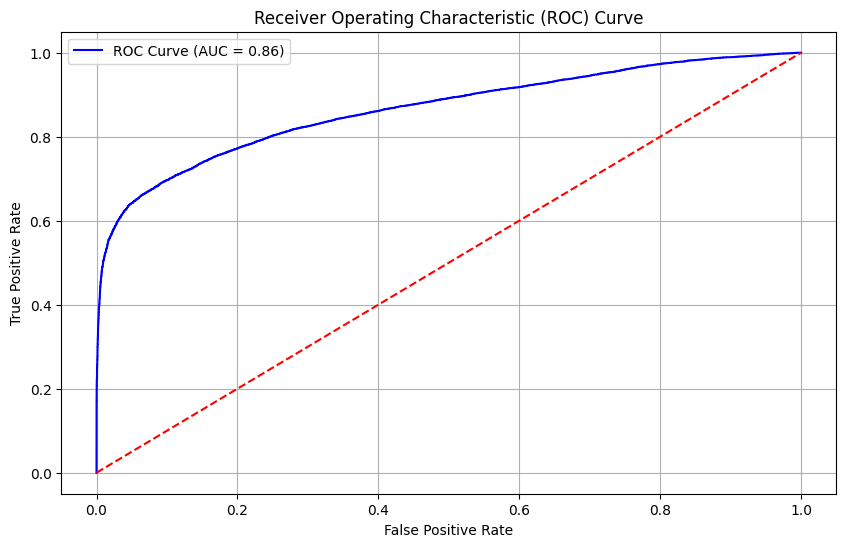

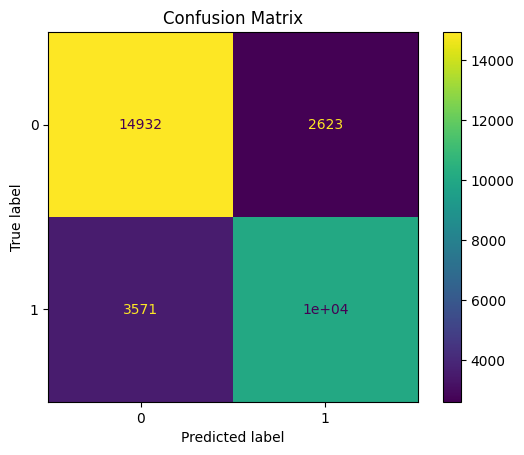

In [78]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

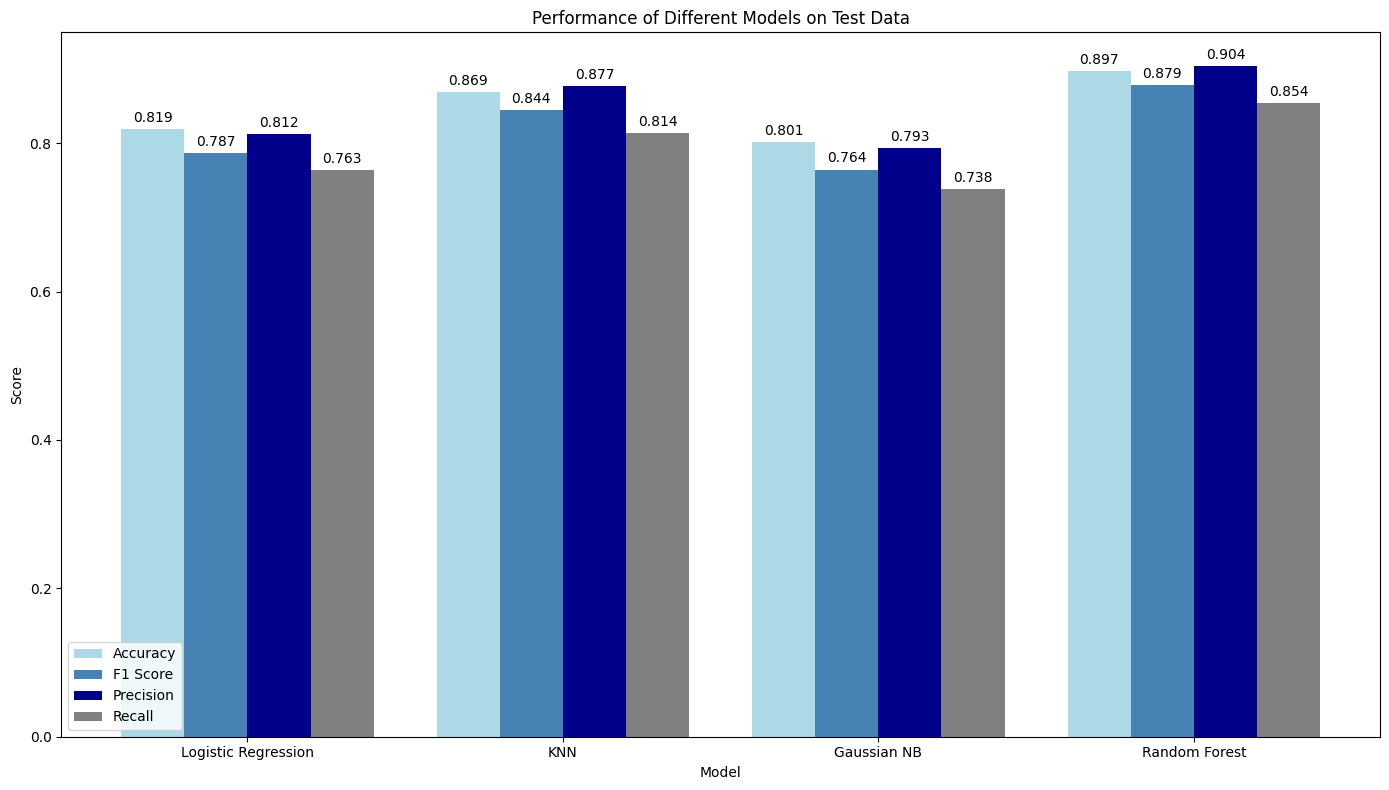

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Scores for each model as provided
scores = {
    'Logistic Regression': {
        'Accuracy': 0.8194212755036572,
        'Precision': 0.8119337706966573,
        'Recall': 0.7634574429022545,
        'F1 Score': 0.7869497748003482
    },
    'KNN': {
        'Accuracy': 0.8688887463107917,
        'Precision': 0.8773958498336766,
        'Recall': 0.8135418961592128,
        'F1 Score': 0.8442632320999885,
    },
    'Gaussian NB': {
        'Accuracy': 0.8012960349031182,
        'Precision': 0.7929591917278396,
        'Recall': 0.737754277741059,
        'F1 Score': 0.7643612569428593,    
    },
    'Random Forest': {
        'Accuracy': 0.8968304889002952,
        'Precision': 0.9041106535084311,
        'Recall': 0.8544466475728868,
        'F1 Score': 0.8785773616250094,   
    }
}

# Data preparation for plotting
models = list(scores.keys())
metrics = list(next(iter(scores.values())).keys())
accuracy_scores = [scores[model]['Accuracy'] for model in models]
f1_scores = [scores[model]['F1 Score'] for model in models]
precision_scores = [scores[model]['Precision'] for model in models]
recall_scores = [scores[model]['Recall'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5 * width, accuracy_scores, width, label='Accuracy', color='lightblue')
rects2 = ax.bar(x - 0.5 * width, f1_scores, width, label='F1 Score', color='steelblue')
rects3 = ax.bar(x + 0.5 * width, precision_scores, width, label='Precision', color='darkblue')
rects4 = ax.bar(x + 1.5 * width, recall_scores, width, label='Recall', color='gray')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance of Different Models on Test Data')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower left')

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
